In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [75]:
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from collections import Counter

# part1: collect data from scraped csv files

In [3]:
df1=pd.read_csv('scientist.csv',sep='\t',index_col=0) #data scientist positions
df2=pd.read_csv('analyst.csv',sep='\t',index_col=0) #data analyst positions
df3=pd.read_csv('engineer.csv',sep='\t',index_col=0) #data engineer positions
df4=pd.read_csv('developer.csv',sep='\t',index_col=0) #BI developer positions
df5=pd.read_csv('consultant.csv',sep='\t',index_col=0) #data science consultant positions


In [4]:
df1.head()

,Company,Industry,JobSummary,Location,Salary,ShortDesp,Title
0,Hydrogen Group Pty Ltd,Information & Communication Technology,About our Client:My client is global leader i...,Perth,£120000.00 - £150000.00 p.a. + plus super and ...,Global consulting firm seeks a Data Scientist ...,Data Scientist
1,Finite IT Recruitment Solutions,Information & Communication Technology,\r\n Are you a Data Scientist looking for a ne...,Melbourne,NaN,Are you a Data Scientist looking for a new exc...,Data Scientist
2,Cubic Transportation Systems,Information & Communication Technology,Only applications submitted through our websit...,Sydney,"$120,000 - $159,999",We are seeking a skilled Data Scientist to joi...,Data Scientist
3,CSK Nexus Pty Ltd,Information & Communication Technology,"Our client, an Australian energy company opera...",Melbourne,NaN,Develop and improve the data science at this c...,Data Scientist/Engineer
4,iSelect Ltd,Science & Technology,"At iSelect, we get that most people find insur...",Melbourne,NaN,We are looking for a Data Scientist with at le...,Data Scientist


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 7 columns):
Company       185 non-null object
Industry      185 non-null object
JobSummary    185 non-null object
Location      185 non-null object
Salary        84 non-null object
ShortDesp     185 non-null object
Title         185 non-null object
dtypes: object(7)
memory usage: 11.6+ KB


In [6]:
df2.head()

,Company,Industry,JobSummary,Location,Salary,ShortDesp,Title
0,TABCORP,Marketing & Communications,Our Company\r\nTabcorp is a world-class divers...,Brisbane,Enjoy flexible working and a Flexi Day on us!,Looking for an experienced SQL/Tableau data an...,Data Analyst
1,TABCORP,Information & Communication Technology,Our Company\r\nTabcorp is a world-class divers...,Brisbane,Enjoy flexible working and a Flexi Day on us!,Looking for an experienced SQL/Tableau data an...,Data Analyst
2,University of Queensland,Education & Training,Job no.504636\r\nProperty and Facilities Divis...,Brisbane,NaN,University of Queensland's Property and Facili...,Data Analyst
3,Department of Health and Human Services,Government & Defence,Number of vacancies available: 1 x Fixed Term ...,Melbourne,NaN,Data Analyst is required to collate and provid...,"Data Analyst - Investigations, Policy and Legal"
4,AGL Energy,Banking & Financial Services,About the Role The Commercial Analyst has the...,Melbourne,NaN,Contribute to AGL’s strategic growth objective...,Commercial Data Analyst


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 7 columns):
Company       346 non-null object
Industry      348 non-null object
JobSummary    348 non-null object
Location      348 non-null object
Salary        120 non-null object
ShortDesp     348 non-null object
Title         348 non-null object
dtypes: object(7)
memory usage: 21.8+ KB


In [8]:
df3.head()

,Company,Industry,JobSummary,Location,Salary,ShortDesp,Title
0,iKas International Australia,Information & Communication Technology,Requirements: Extensive experience working on ...,Sydney,$90k - $120k p.a. + Bonus,Excellent opportunity to collaborate with a Gl...,Data Engineer - Tableau Developer
1,Ethos BeathChapman,Information & Communication Technology,We are looking for a Data Engineer for one of ...,Sydney,"Up to $110,000 plus super",Our banking client is looking for a Data Engin...,Data Engineer
2,Onset Group,Information & Communication Technology,Linking digital and real world data is what th...,Sydney,"$140,000 - $150,000 + Super",Love Data Engineering? Read on:,Data Engineer
3,Xpand Group Pty Ltd,Information & Communication Technology,Data Engineer An exponentially growing financ...,Melbourne,NaN,Looking for a capable Data Engineer with stron...,Data Engineer
4,become,Information & Communication Technology,One of Australia’s leading technology consulta...,Melbourne,"$80,000 - $130,000 + S",A leading technology consultancy in Australia ...,Data Engineer


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 285
Data columns (total 7 columns):
Company       282 non-null object
Industry      286 non-null object
JobSummary    286 non-null object
Location      286 non-null object
Salary        125 non-null object
ShortDesp     286 non-null object
Title         286 non-null object
dtypes: object(7)
memory usage: 17.9+ KB


In [10]:
df4.head()

,Company,Industry,JobSummary,Location,Salary,ShortDesp,Title
0.0,Dimension Data,Information & Communication Technology,Do you believe you can do anything? Then we’re...,Sydney,NaN,Power BI developer required for initial 3 Mont...,Business Intelligence Developer
1.0,Single Cell,Information & Communication Technology,"Single Cell is a young, Sydney based, agile Sa...",Sydney,NaN,We are looking for a BI Business Analyst to ow...,Business Intelligence Analyst
2.0,NAKAMA Sydney,Information & Communication Technology,We are looking for a Power BI AWS/Redshift dev...,Sydney,Negotiable,We are looking for a Power BI Developer with A...,Business Intelligence Developer (AWS/ Redshift)
3.0,HCM Australia,Information & Communication Technology,The BusinessYou will be working for a...,Sydney,"$150,000 Package","Design, Develop, Test, Optimise and maintain ...",OBIEE Oracle Business intelligence developer
4.0,Infinity Pro,Information & Communication Technology,Your Benefits: Great Remuneration Package; En...,Sydney,End User Company - Great Remuneration & Benefits,Microsoft Business Intelligence Consultant - S...,"SSIS ETL, SSAS Microsoft Business Intelligence..."


In [11]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 180 entries, 0.0 to 178.0
Data columns (total 7 columns):
Company       176 non-null object
Industry      179 non-null object
JobSummary    179 non-null object
Location      179 non-null object
Salary        74 non-null object
ShortDesp     179 non-null object
Title         178 non-null object
dtypes: object(7)
memory usage: 11.2+ KB


In [12]:
df5.head()

,Company,Industry,JobSummary,Location,Salary,ShortDesp,Title
0,Evolution Recruitment Solutions Pty Ltd,Science & Technology,Contract to permanent opportunity: $700-850 pe...,Sydney,NaN,Contract to perm opportunity: Data Science Con...,Senior Data Science Consultant
1,KPMG Australia,Accounting,\r\nGot big plans for your career? Ours are ev...,Sydney,NaN,KPMG's Forensic Technology/Data Analytics team...,Forensic Senior Consultant/Manager (Forensic T...
2,Coulon Consulting Recruitment Services P ty Ltd,Information & Communication Technology,Senior Consultant - Business Intelligence & D...,Sydney,NaN,As a newly created role the Senior BI & Data A...,Senior Consultant - Business Intelligence & Da...
3,Fernway Partners,Banking & Financial Services,Looking for your first True Data Scientist Rol...,Sydney,NaN,Looking for your first True Data Scientist Rol...,Looking for your first True Data Science Role...?
4,Talent Insights Group Pty Ltd,Science & Technology,We are currently recruiting a Consulting Data ...,Sydney,NaN,Amazing opportunity to be part of a start up t...,Data Science Consultant


In [13]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 395
Data columns (total 7 columns):
Company       391 non-null object
Industry      396 non-null object
JobSummary    396 non-null object
Location      396 non-null object
Salary        128 non-null object
ShortDesp     396 non-null object
Title         396 non-null object
dtypes: object(7)
memory usage: 24.8+ KB


In [14]:
df1['category']=np.zeros(len(df1.index))
df1.category=df1.category.apply(lambda x: 1)

In [15]:
df1.head()

,Company,Industry,JobSummary,Location,Salary,ShortDesp,Title,category
0,Hydrogen Group Pty Ltd,Information & Communication Technology,About our Client:My client is global leader i...,Perth,£120000.00 - £150000.00 p.a. + plus super and ...,Global consulting firm seeks a Data Scientist ...,Data Scientist,1
1,Finite IT Recruitment Solutions,Information & Communication Technology,\r\n Are you a Data Scientist looking for a ne...,Melbourne,NaN,Are you a Data Scientist looking for a new exc...,Data Scientist,1
2,Cubic Transportation Systems,Information & Communication Technology,Only applications submitted through our websit...,Sydney,"$120,000 - $159,999",We are seeking a skilled Data Scientist to joi...,Data Scientist,1
3,CSK Nexus Pty Ltd,Information & Communication Technology,"Our client, an Australian energy company opera...",Melbourne,NaN,Develop and improve the data science at this c...,Data Scientist/Engineer,1
4,iSelect Ltd,Science & Technology,"At iSelect, we get that most people find insur...",Melbourne,NaN,We are looking for a Data Scientist with at le...,Data Scientist,1


In [16]:
df2['category']=np.zeros(len(df2.index))
df2.category=df2.category.apply(lambda x: 2)
df2.head()

,Company,Industry,JobSummary,Location,Salary,ShortDesp,Title,category
0,TABCORP,Marketing & Communications,Our Company\r\nTabcorp is a world-class divers...,Brisbane,Enjoy flexible working and a Flexi Day on us!,Looking for an experienced SQL/Tableau data an...,Data Analyst,2
1,TABCORP,Information & Communication Technology,Our Company\r\nTabcorp is a world-class divers...,Brisbane,Enjoy flexible working and a Flexi Day on us!,Looking for an experienced SQL/Tableau data an...,Data Analyst,2
2,University of Queensland,Education & Training,Job no.504636\r\nProperty and Facilities Divis...,Brisbane,NaN,University of Queensland's Property and Facili...,Data Analyst,2
3,Department of Health and Human Services,Government & Defence,Number of vacancies available: 1 x Fixed Term ...,Melbourne,NaN,Data Analyst is required to collate and provid...,"Data Analyst - Investigations, Policy and Legal",2
4,AGL Energy,Banking & Financial Services,About the Role The Commercial Analyst has the...,Melbourne,NaN,Contribute to AGL’s strategic growth objective...,Commercial Data Analyst,2


In [17]:
df3['category']=np.zeros(len(df3.index))
df3.category=df3.category.apply(lambda x: 3)
df3.head()

,Company,Industry,JobSummary,Location,Salary,ShortDesp,Title,category
0,iKas International Australia,Information & Communication Technology,Requirements: Extensive experience working on ...,Sydney,$90k - $120k p.a. + Bonus,Excellent opportunity to collaborate with a Gl...,Data Engineer - Tableau Developer,3
1,Ethos BeathChapman,Information & Communication Technology,We are looking for a Data Engineer for one of ...,Sydney,"Up to $110,000 plus super",Our banking client is looking for a Data Engin...,Data Engineer,3
2,Onset Group,Information & Communication Technology,Linking digital and real world data is what th...,Sydney,"$140,000 - $150,000 + Super",Love Data Engineering? Read on:,Data Engineer,3
3,Xpand Group Pty Ltd,Information & Communication Technology,Data Engineer An exponentially growing financ...,Melbourne,NaN,Looking for a capable Data Engineer with stron...,Data Engineer,3
4,become,Information & Communication Technology,One of Australia’s leading technology consulta...,Melbourne,"$80,000 - $130,000 + S",A leading technology consultancy in Australia ...,Data Engineer,3


In [18]:
df4['category']=np.zeros(len(df4.index))
df4.category=df4.category.apply(lambda x: 4)
df4.head()

,Company,Industry,JobSummary,Location,Salary,ShortDesp,Title,category
0.0,Dimension Data,Information & Communication Technology,Do you believe you can do anything? Then we’re...,Sydney,NaN,Power BI developer required for initial 3 Mont...,Business Intelligence Developer,4
1.0,Single Cell,Information & Communication Technology,"Single Cell is a young, Sydney based, agile Sa...",Sydney,NaN,We are looking for a BI Business Analyst to ow...,Business Intelligence Analyst,4
2.0,NAKAMA Sydney,Information & Communication Technology,We are looking for a Power BI AWS/Redshift dev...,Sydney,Negotiable,We are looking for a Power BI Developer with A...,Business Intelligence Developer (AWS/ Redshift),4
3.0,HCM Australia,Information & Communication Technology,The BusinessYou will be working for a...,Sydney,"$150,000 Package","Design, Develop, Test, Optimise and maintain ...",OBIEE Oracle Business intelligence developer,4
4.0,Infinity Pro,Information & Communication Technology,Your Benefits: Great Remuneration Package; En...,Sydney,End User Company - Great Remuneration & Benefits,Microsoft Business Intelligence Consultant - S...,"SSIS ETL, SSAS Microsoft Business Intelligence...",4


In [19]:
df5['category']=np.zeros(len(df5.index))
df5.category=df5.category.apply(lambda x: 5)
df5.head()

,Company,Industry,JobSummary,Location,Salary,ShortDesp,Title,category
0,Evolution Recruitment Solutions Pty Ltd,Science & Technology,Contract to permanent opportunity: $700-850 pe...,Sydney,NaN,Contract to perm opportunity: Data Science Con...,Senior Data Science Consultant,5
1,KPMG Australia,Accounting,\r\nGot big plans for your career? Ours are ev...,Sydney,NaN,KPMG's Forensic Technology/Data Analytics team...,Forensic Senior Consultant/Manager (Forensic T...,5
2,Coulon Consulting Recruitment Services P ty Ltd,Information & Communication Technology,Senior Consultant - Business Intelligence & D...,Sydney,NaN,As a newly created role the Senior BI & Data A...,Senior Consultant - Business Intelligence & Da...,5
3,Fernway Partners,Banking & Financial Services,Looking for your first True Data Scientist Rol...,Sydney,NaN,Looking for your first True Data Scientist Rol...,Looking for your first True Data Science Role...?,5
4,Talent Insights Group Pty Ltd,Science & Technology,We are currently recruiting a Consulting Data ...,Sydney,NaN,Amazing opportunity to be part of a start up t...,Data Science Consultant,5


In [20]:
df1.shape[0]+df2.shape[0]+df3.shape[0]+df4.shape[0]+df5.shape[0]

1395

In [21]:
df=pd.concat([df1,df2,df3,df4,df5],axis=0)  #combine 5 dataframes together
df.shape

(1395, 8)

In [22]:
df.category.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [23]:
df.reset_index(inplace=True)

In [24]:
df.index

RangeIndex(start=0, stop=1395, step=1)

In [25]:
df.head()

,index,Company,Industry,JobSummary,Location,Salary,ShortDesp,Title,category
0,0.0,Hydrogen Group Pty Ltd,Information & Communication Technology,About our Client:My client is global leader i...,Perth,£120000.00 - £150000.00 p.a. + plus super and ...,Global consulting firm seeks a Data Scientist ...,Data Scientist,1
1,1.0,Finite IT Recruitment Solutions,Information & Communication Technology,\r\n Are you a Data Scientist looking for a ne...,Melbourne,NaN,Are you a Data Scientist looking for a new exc...,Data Scientist,1
2,2.0,Cubic Transportation Systems,Information & Communication Technology,Only applications submitted through our websit...,Sydney,"$120,000 - $159,999",We are seeking a skilled Data Scientist to joi...,Data Scientist,1
3,3.0,CSK Nexus Pty Ltd,Information & Communication Technology,"Our client, an Australian energy company opera...",Melbourne,NaN,Develop and improve the data science at this c...,Data Scientist/Engineer,1
4,4.0,iSelect Ltd,Science & Technology,"At iSelect, we get that most people find insur...",Melbourne,NaN,We are looking for a Data Scientist with at le...,Data Scientist,1


In [26]:
df.info() #there are a lot of nulls in 'salary'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 9 columns):
index         1394 non-null float64
Company       1380 non-null object
Industry      1394 non-null object
JobSummary    1394 non-null object
Location      1394 non-null object
Salary        531 non-null object
ShortDesp     1394 non-null object
Title         1393 non-null object
category      1395 non-null int64
dtypes: float64(1), int64(1), object(7)
memory usage: 98.2+ KB


In [27]:
df.iloc[0,5]  # salary is string type and dirty. So cleaning is required

'£120000.00 - £150000.00 p.a. + plus super and bonu'

In [28]:
df.Salary.unique()

array(['£120000.00 - £150000.00 p.a. + plus super and bonu', nan,
       '$120,000 - $159,999', '$100k - $150k p.a.',
       'Base + Super + Profit Share',
       '£110000.00 - £130000.00 p.a. + super and bonus',
       'Highly competitive package', 'Base + Super + Bonus',
       'Great Rems + End User + Parking + Generous Bonuses',
       'Up to $180000.00 p.a.', 'c$150K Base',
       'Up to $140,000 plus bonus', '$90-120k + Super & Bonus',
       'Very Attractive Package', '$70k - $130k p.a.',
       '5 weeks annual leave + Company bonus',
       '$120k - $140k p.a. + Car allowance',
       'Up to $190,000 + super + 20% bonus',
       '$110k - $130k base + super ', '$140,000 - $150,000 + Super',
       '$140000.00 - $150000.00 p.a. + inc super ',
       'Competitive salary, onsite parking and gym',
       'Newly created role for our growing D&T team',
       '$150k - $180k p.a. + super', '$90K-$100K + Super + Bonus',
       '$131785 - $145809 p.a. + plus up to 15.4% super',
       '$

# part2 data cleaning

In [29]:
df.Salary.replace(regex=True, inplace=True, to_replace=",", value="") #to remove ',' in salary

In [30]:
df['sv']=pd.Series(np.zeros(len(df['Title'])),index=df.index)

In [31]:
import re #introduce regex to extract salary data

In [32]:
def extracts(text):
    pa=['p.d','hour','per day','pd','a day','p.h.','p/d'] #to filter out salary per hour,per day
    
    tag=False
    max_n=0
    max2_n=0
    for c in pa:
        tag|= (c in text)
    if not tag:        
        ex = re.compile('[0-9]+')

        exk=re.compile('[0-9]+[k]')
        resp=ex.findall(text)

        respk=exk.findall(text)

        #print('resp:',resp)

        #print('respk:',respk)

        number=[0,0,0,0,0,0]
        k=0

        

        if respk:
            for n in respk:
                fn=int(n[:-1])
                if fn>=25:
                    number[k]=fn*1000
                    k+=1
                #else:
                    #print('fn<10',text)
        #print(number)
        if (len(respk)<2)|(max(number)<11000):
            if resp:
                for n in resp:
                    fn=int(n)
                    if fn>=25:
                        if fn<300:
                            if fn*1000 not in number:
                                number[k]=fn*1000
                        else:
                            if fn not in number:
                                number[k]=fn
                        k+=1

        
        max_n=max(number)
        number.remove(max_n)
        max2_n=max(number)
        
        if (max_n>25000):
            if (max2_n>21000) :
                if '£' in text:  #if the currency in pound
                    return (max_n+max2_n)/2*1.75
                else:
                    return (max_n+max2_n)/2
            else:
                if '£' in text:
                    return max_n*1.75
                else:
                    return max_n
        else:
            return 0
        
        
    else:
        return 0
    

In [33]:
non_null_index=df[df['Salary'].isnull()==False].index
for i in non_null_index:
    t=df.iloc[i,5]
    df.iloc[i,9]=extracts(t)

In [34]:
df[['Salary','sv']]

,Salary,sv
0,£120000.00 - £150000.00 p.a. + plus super and ...,236250.0
1,NaN,0.0
2,$120000 - $159999,139999.5
3,NaN,0.0
4,NaN,0.0
5,NaN,0.0
6,$100k - $150k p.a.,125000.0
7,Base + Super + Profit Share,0.0
8,£110000.00 - £130000.00 p.a. + super and bonus,210000.0
9,NaN,0.0


In [35]:
dfs=df[df.sv>0] #extract records with salary values
dfs.reset_index(inplace=True)
dfs.head()

,level_0,index,Company,Industry,JobSummary,Location,Salary,ShortDesp,Title,category,sv
0,0,0.0,Hydrogen Group Pty Ltd,Information & Communication Technology,About our Client:My client is global leader i...,Perth,£120000.00 - £150000.00 p.a. + plus super and ...,Global consulting firm seeks a Data Scientist ...,Data Scientist,1,236250.0
1,2,2.0,Cubic Transportation Systems,Information & Communication Technology,Only applications submitted through our websit...,Sydney,$120000 - $159999,We are seeking a skilled Data Scientist to joi...,Data Scientist,1,139999.5
2,6,6.0,Randstad - Technologies,Information & Communication Technology,Randstad are on the lookout for a 5 Data Scien...,Sydney,$100k - $150k p.a.,"Permanent roles x5, CBD location, Paying a ran...",Data Scientist x5 (All levels),1,125000.0
3,8,8.0,Hydrogen Group Pty Ltd,Science & Technology,About our Client: My client is global leader...,Melbourne,£110000.00 - £130000.00 p.a. + super and bonus,Global consulting firm seeks a Data Scientist ...,Data Scientist,1,210000.0
4,18,18.0,Bluefin Resources Pty Limited,Science & Technology,"Our client is a national, reputable and well-k...",Sydney,Up to $180000.00 p.a.,Newly created team to use advanced analytics t...,Data Scientist | Big data environment | Hadoop...,1,180000.0


In [36]:
dfs.shape  #only 380 rows containing salary information

(380, 11)

# part3: EDA

In [37]:
df.Industry.unique()

array(['Information & Communication Technology', 'Science & Technology',
       'Marketing & Communications', 'Banking & Financial Services',
       'Consulting & Strategy', 'Hospitality & Tourism',
       'Government & Defence', 'Mining, Resources & Energy', 'Accounting',
       'Sales', 'Human Resources & Recruitment',
       'CEO & General Management', 'Education & Training',
       'Community Services & Development',
       'Manufacturing, Transport & Logistics', 'Healthcare & Medical',
       'Advertising, Arts & Media', 'Legal', 'Insurance & Superannuation',
       'Call Centre & Customer Service',
       'Administration & Office Support', 'Design & Architecture',
       'Engineering', 'Construction', 'Trades & Services',
       'Real Estate & Property', nan, 'Farming, Animals & Conservation'],
      dtype=object)

In [38]:
len(df.Industry.unique()) #altogether 28 industries included

28

In [39]:
df.Company.unique()

array(['Hydrogen Group Pty Ltd', 'Finite IT Recruitment Solutions',
       'Cubic Transportation Systems', 'CSK Nexus Pty Ltd', 'iSelect Ltd',
       'Chandler Macleod Group', 'Randstad - Technologies',
       'SEEK Limited', 'Eagna Consulting', 'Capgemini Australia Pty Ltd',
       'FIRESOFT Consulting', '7-Eleven Australia', 'Veritec',
       'Infinity Pro', 'Xpand Group Pty Ltd',
       'PetSure (Australia) Pty Ltd', 'ASC',
       'Bluefin Resources Pty Limited', 'inDmand Career Solutions',
       'United Super Pty Ltd', 'Ethos BeathChapman', 'Valrose',
       'Correlate Resources', 'T+O+M Executive',
       'Cognizant Technology Solutions Australia Pty Ltd',
       'Evolution Recruitment Solutions Pty Ltd', 'HCM Australia',
       'Hudson', 'Technology One Limited', 'Precision Sourcing',
       'Annalect', 'sportsbet.com.au', 'Talent Insights Group Pty Ltd',
       'Freelancer.com', 'ME Bank',
       'Talent – Winner ‘Seek Large Recruitment Agency of the Year’ 3 consecutive years!'

In [40]:
len(df.Company.unique()) #540 companies advertised jobs

540

In [41]:
df.Location.unique()

array(['Perth', 'Melbourne', 'Sydney', 'Adelaide', 'ACT', 'Brisbane',
       'Gold Coast', 'Newcastle, Maitland & Hunter',
       'Mornington Peninsula & Bass Coast', 'Bunbury & South West',
       'West Gippsland & Latrobe Valley', 'Dubbo & Central NSW',
       'Blue Mountains & Central West', 'Hobart', 'Northern QLD',
       'Lismore & Far North Coast', 'Gosford & Central Coast',
       'Bendigo, Goldfields & Macedon Ranges',
       'Wollongong, Illawarra & South Coast',
       'Port Hedland, Karratha & Pilbara', 'Mandurah & Peel', 'Darwin',
       nan, 'Sunshine Coast', 'Albany & Great Southern',
       'Mackay & Coalfields', 'Cairns & Far North', 'Mildura & Murray',
       'Somerset & Lockyer'], dtype=object)

In [43]:
len(df.Location.unique()) # 29 different cities and regions

29

In [44]:
df.groupby('Location').count().sort_values(by='Company',ascending=False).head(10)

,index,Company,Industry,JobSummary,Salary,ShortDesp,Title,category,sv
Location,,,,,,,,,
Sydney,710,702,710,710,309,710,710,710,710
Melbourne,366,364,366,366,141,366,366,366,366
Brisbane,123,121,123,123,24,123,122,123,123
Perth,59,59,59,59,16,59,59,59,59
ACT,41,41,41,41,18,41,41,41,41
Adelaide,39,38,39,39,9,39,39,39,39
"Newcastle, Maitland & Hunter",11,11,11,11,3,11,11,11,11
"Wollongong, Illawarra & South Coast",5,5,5,5,1,5,5,5,5
Gold Coast,4,4,4,4,2,4,4,4,4


In [45]:
df.groupby('Industry').count().sort_values(by='Company',ascending=False).head(10)

,index,Company,JobSummary,Location,Salary,ShortDesp,Title,category,sv
Industry,,,,,,,,,
Information & Communication Technology,809,800,809,809,341,809,808,809,809
Science & Technology,105,104,105,105,26,105,105,105,105
Consulting & Strategy,90,90,90,90,20,90,90,90,90
Marketing & Communications,67,65,67,67,29,67,67,67,67
Banking & Financial Services,54,53,54,54,22,54,54,54,54
Engineering,45,45,45,45,12,45,45,45,45
Government & Defence,39,39,39,39,21,39,39,39,39
Education & Training,31,31,31,31,10,31,31,31,31
Healthcare & Medical,28,28,28,28,6,28,28,28,28


Text(0.5,1,'Average salary over AU cities and regions')

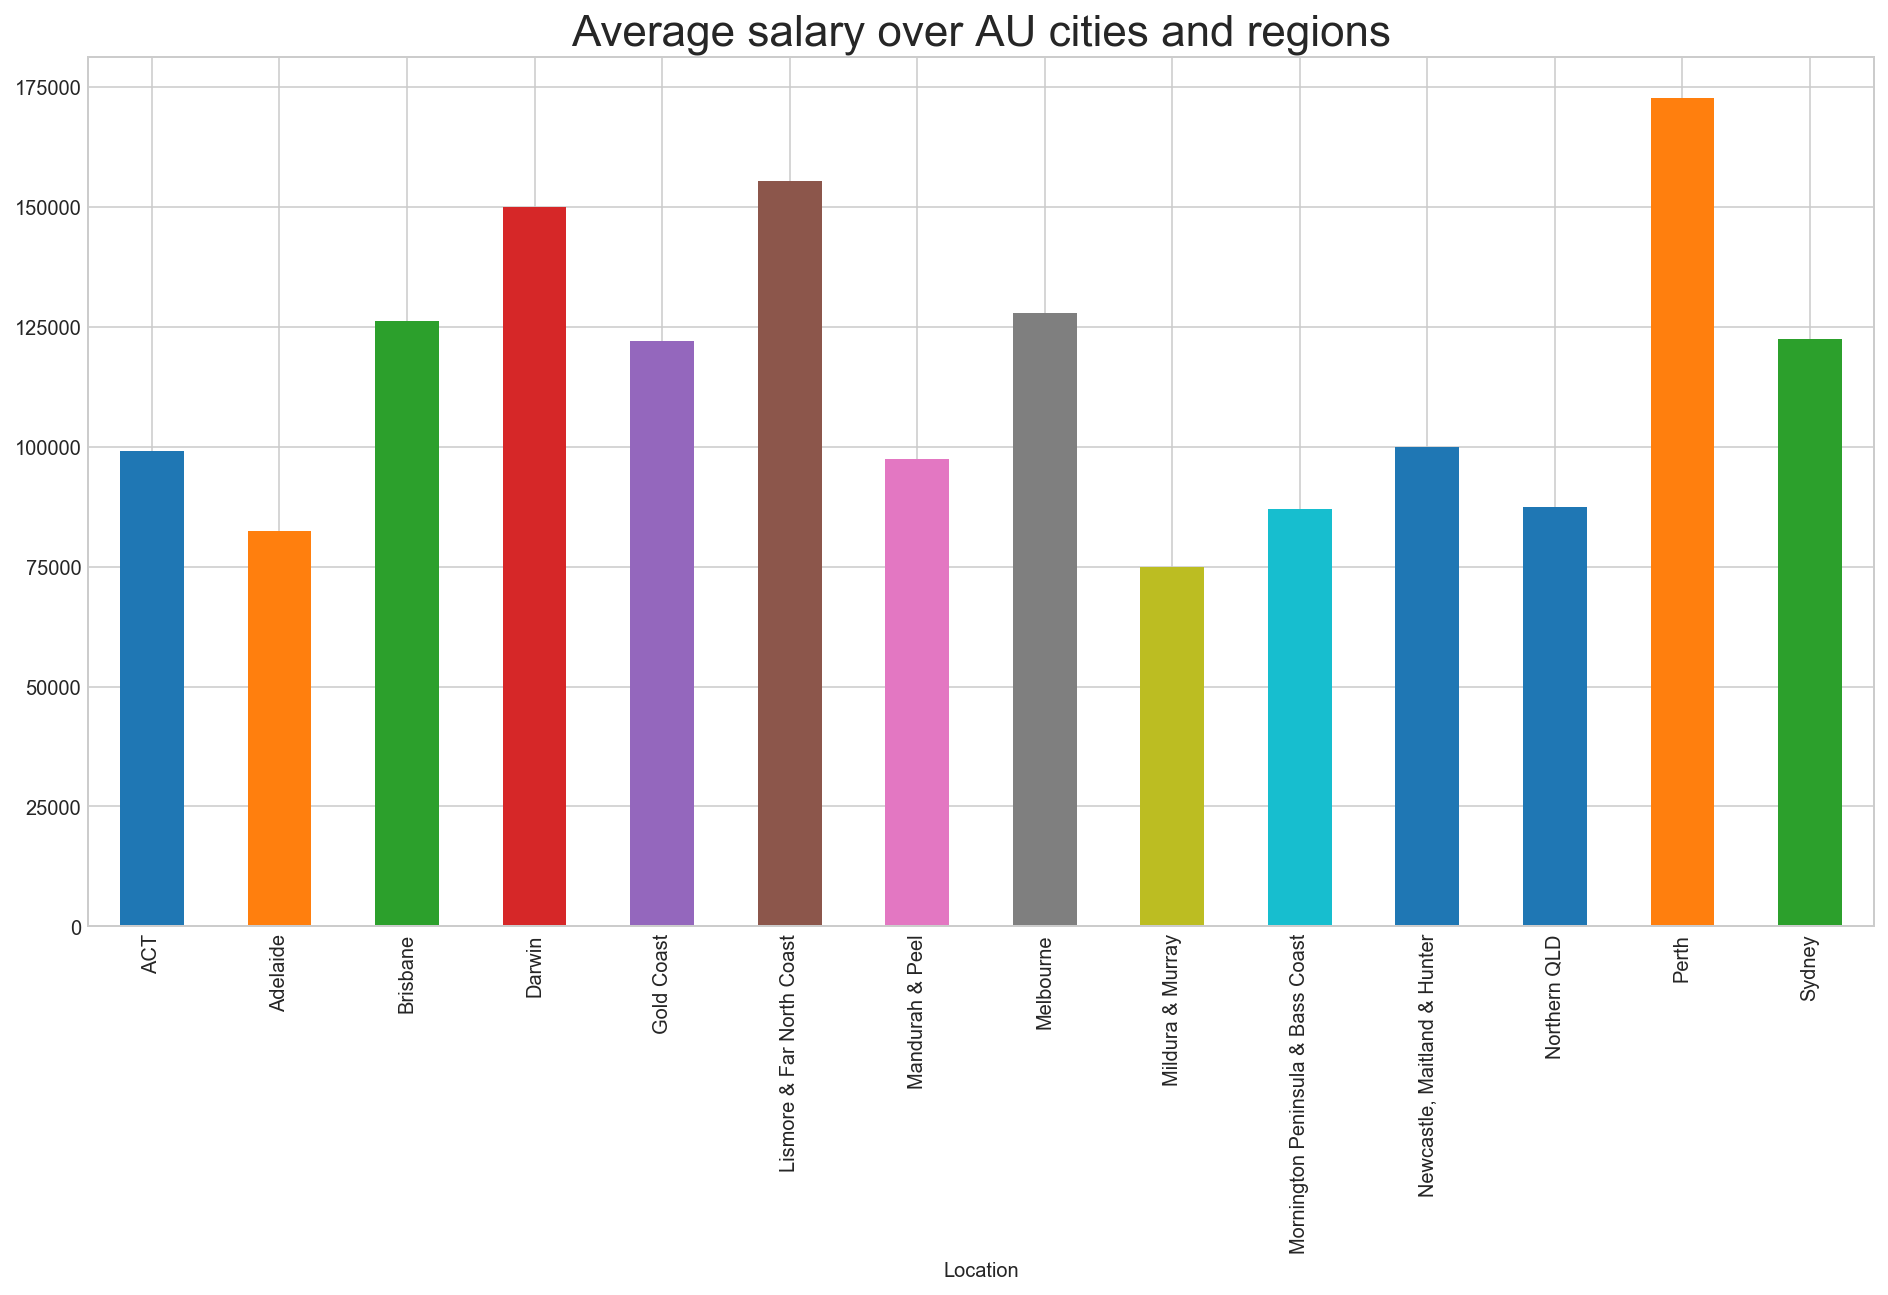

In [46]:
ax=dfs.groupby('Location').sv.mean().plot(kind='bar', figsize=(16,8))
ax.set_title('Average salary over AU cities and regions', fontsize=22)

Text(0.5,1,'Average salary vs. Industries')

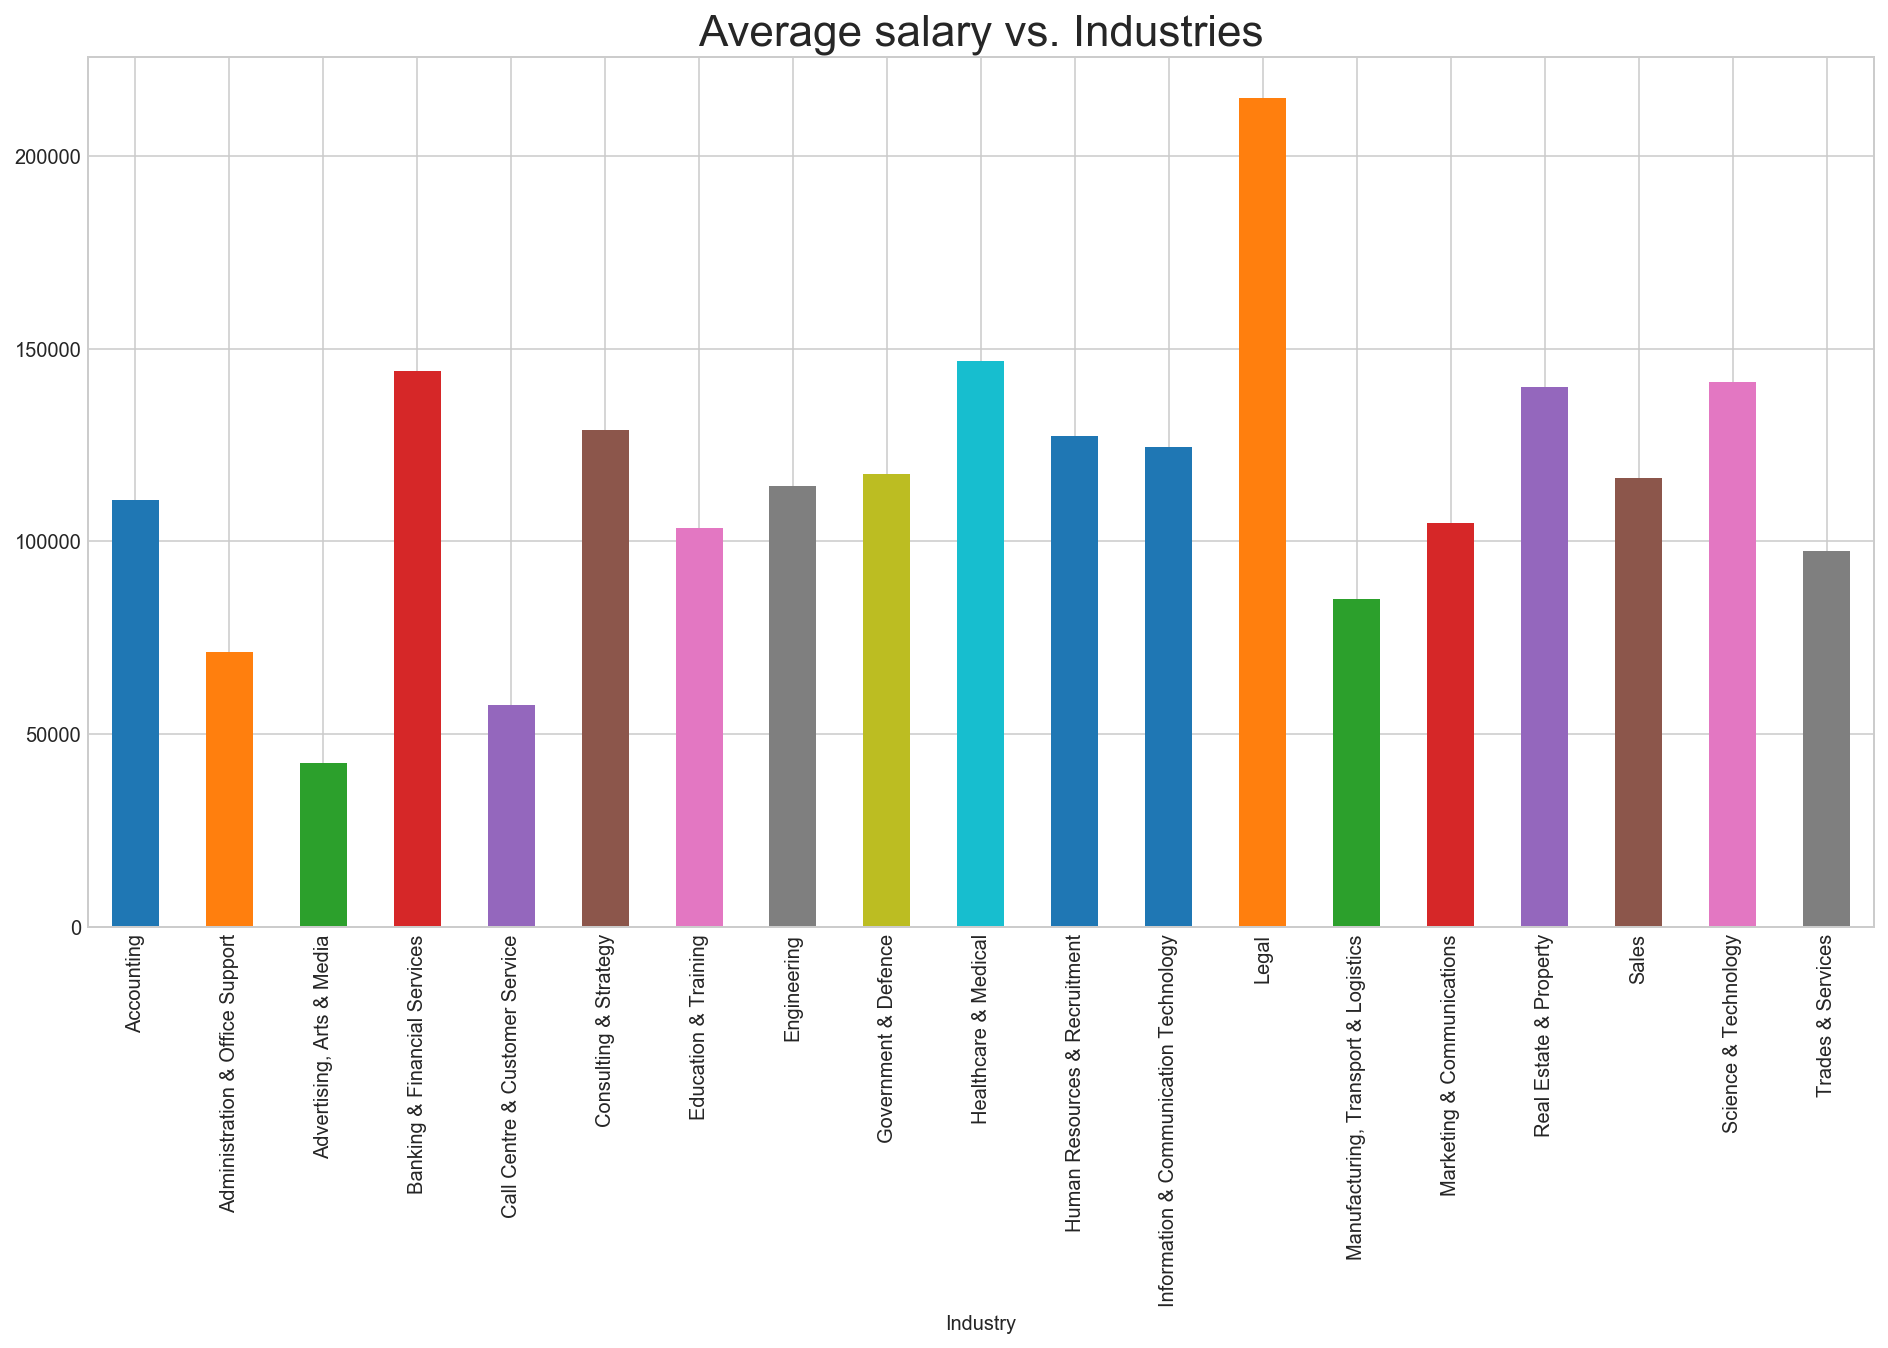

In [47]:
ax=dfs.groupby('Industry').sv.mean().plot(kind='bar', figsize=(16,8))
ax.set_title('Average salary vs. Industries', fontsize=22)

Text(0.5,1,'Average salary vs. categories')

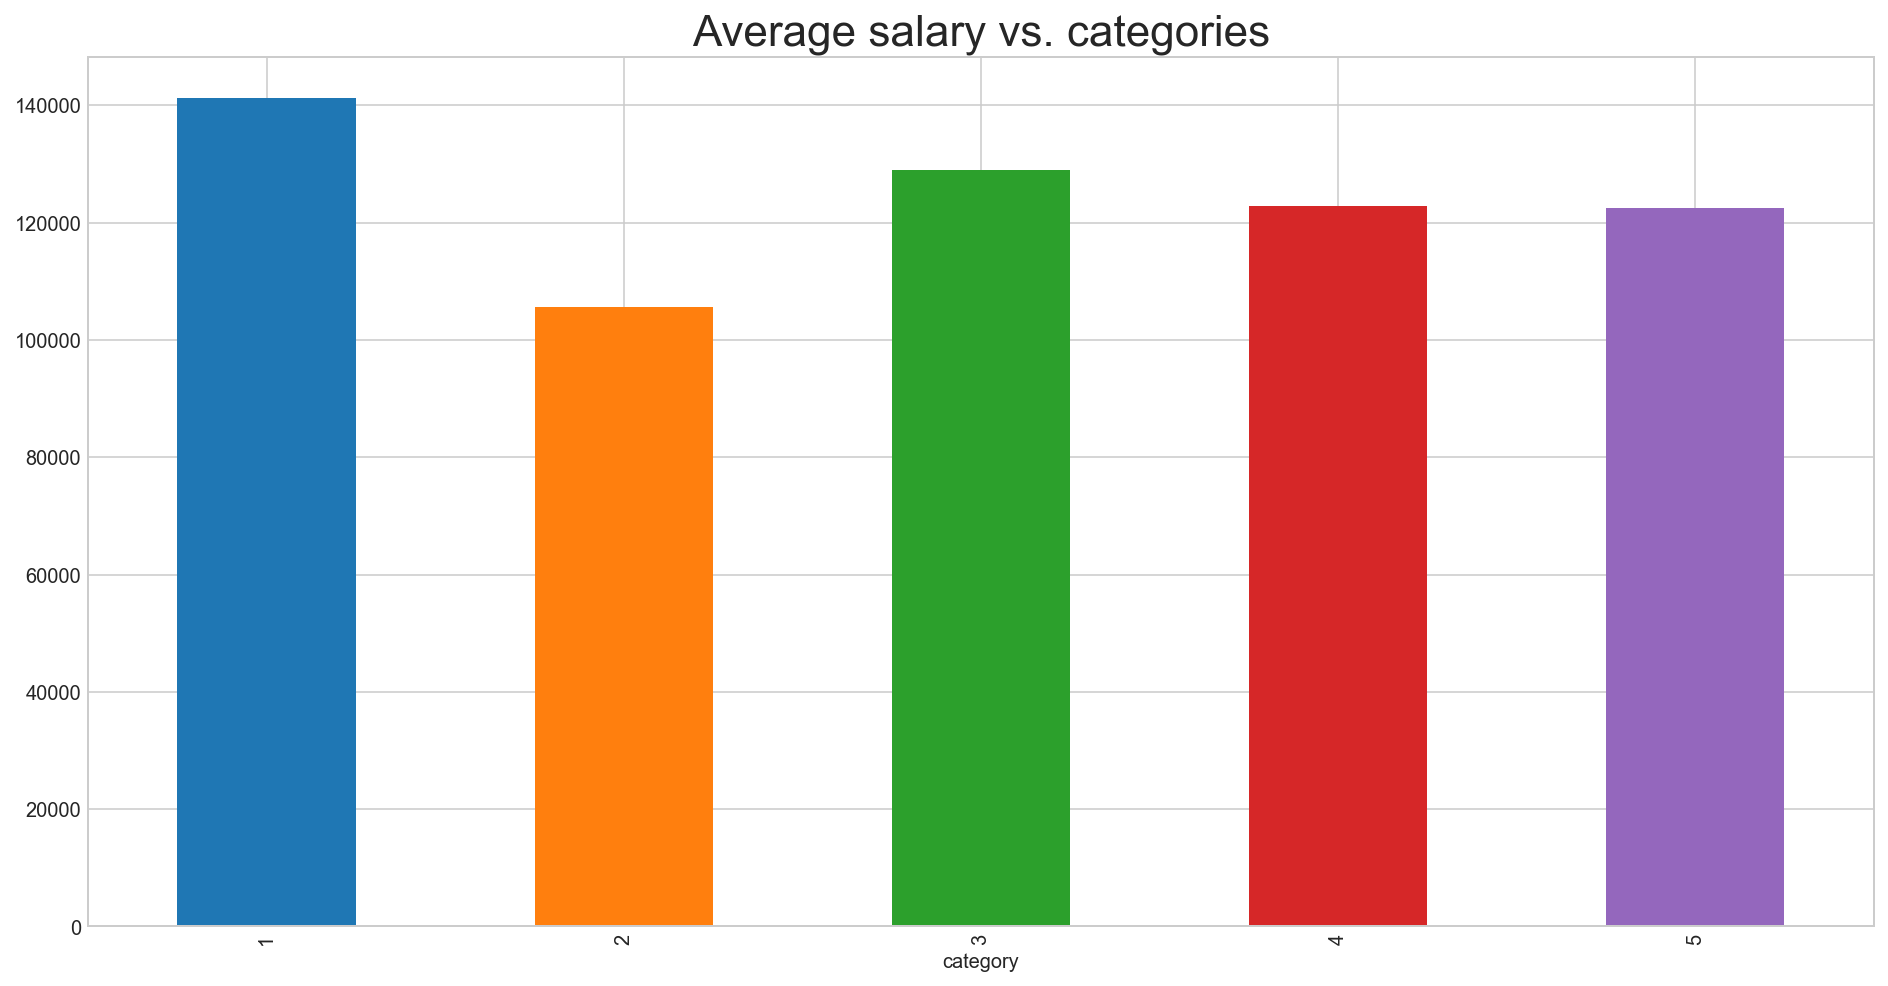

In [48]:
ax=dfs.groupby('category').sv.mean().plot(kind='bar', figsize=(16,8))
ax.set_title('Average salary vs. categories', fontsize=22)
#1: data scientist
#2: data analyst
#3: data engineer
#4: BI developer
#5: data science consultant

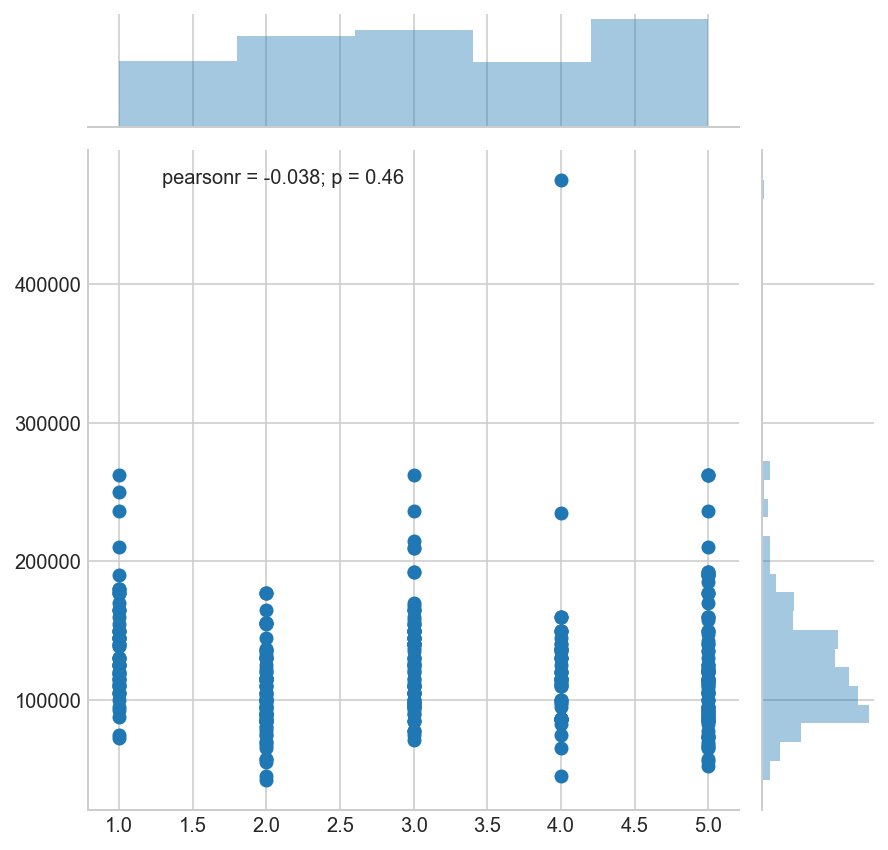

In [49]:
ax=sns.jointplot(dfs.category.values, dfs.sv.values)  #it looks like that the correlation between salary and category is weak

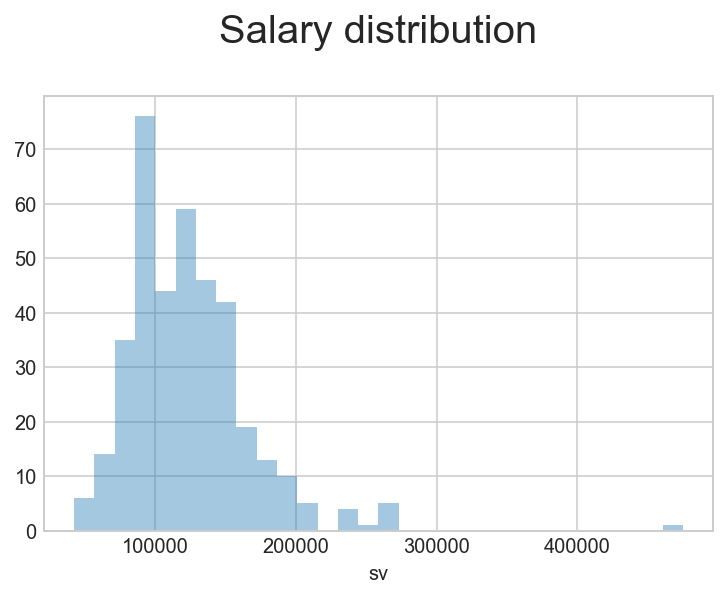

In [50]:
ax = sns.distplot(dfs['sv'],bins=30, kde=False)
ax.set_title('Salary distribution\n',fontsize=20)
plt.show()

Text(0.5,1,'Salary statistics\n')

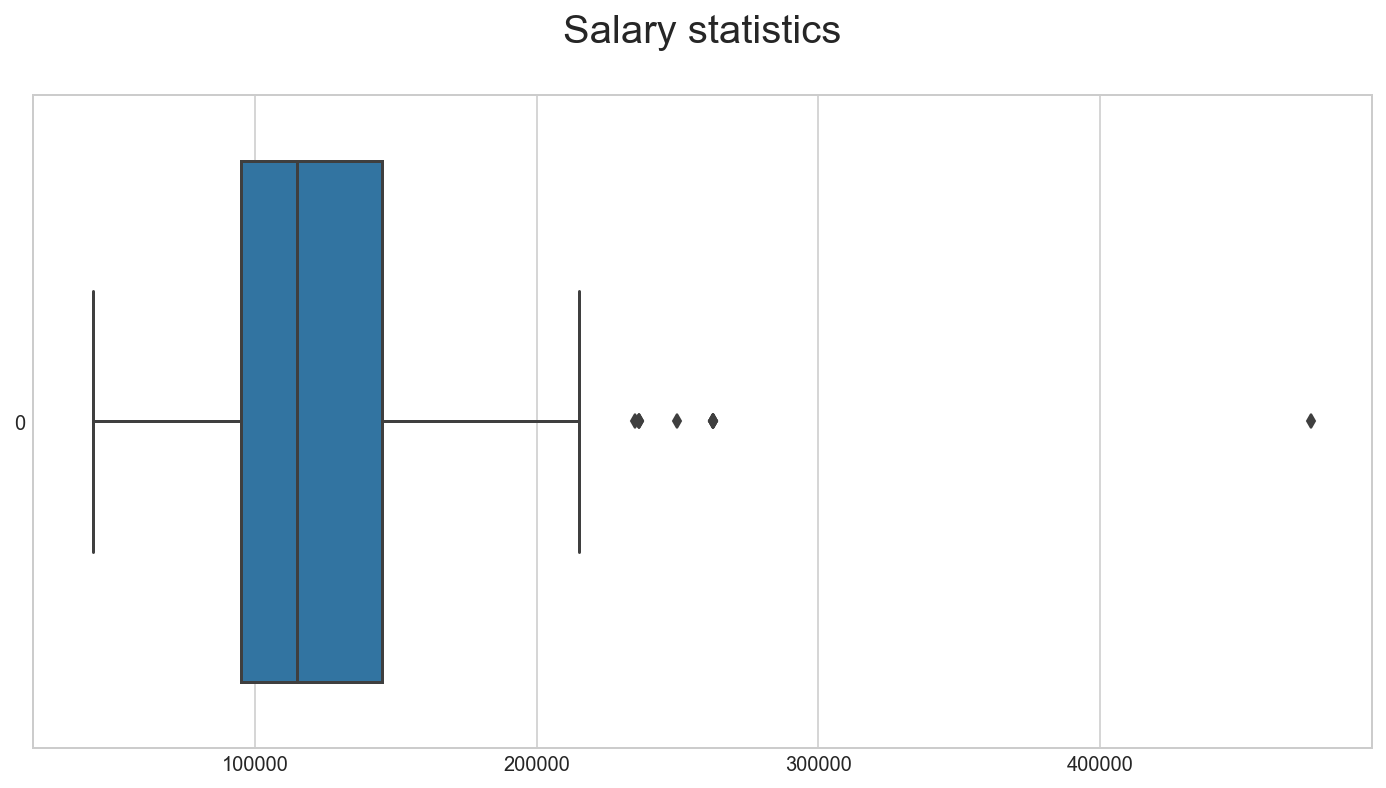

In [51]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.boxplot(data=dfs['sv'], orient='h')
ax.set_title('Salary statistics\n',fontsize=20)

appearently 50% of the salary values spread between 100k and about 160k. a few outliers beyond 230k

In [52]:
df['junior'] =  df['Title'].str.lower().str.contains('junior')

In [53]:
df.junior=df.junior.apply(lambda x: int(x) if (x==True) | (x==False) else 0)

In [54]:
df['senior'] =  df['Title'].str.lower().str.contains('senior')

In [55]:
df.senior=df.senior.apply(lambda x: int(x) if (x==True) | (x==False) else 0)

In [56]:
df['middle']=1-(df['junior']+df['senior'])

In [57]:
dfs=df[df.sv>0]

In [58]:
dfj=dfs[df.junior>0]['sv']

C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [59]:
dfm=dfs[df.middle>0]['sv']

C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [60]:
dfsn=dfs[df.senior>0]['sv']

C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


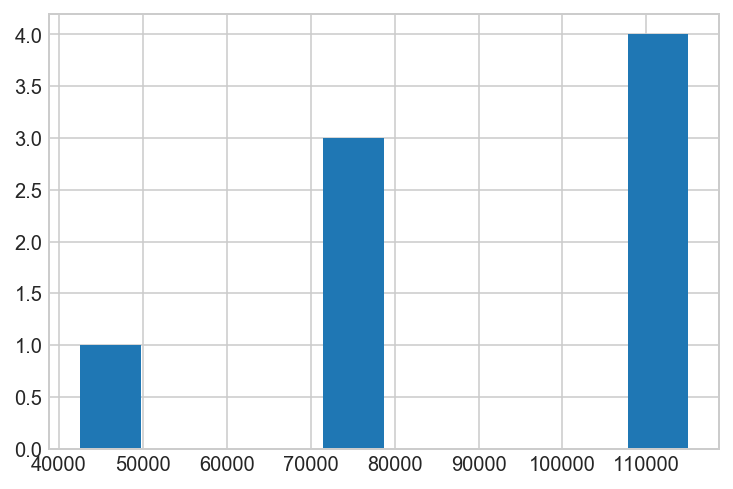

In [61]:
dfj.hist(bins=10) #junior position salaries

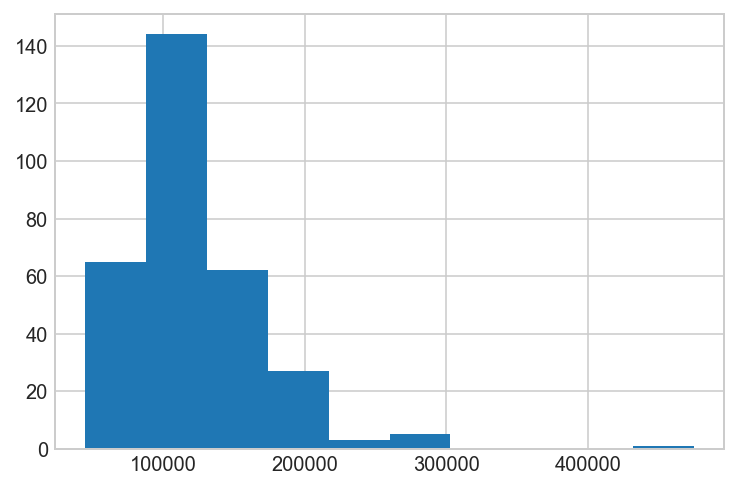

In [62]:
dfm.hist(bins=10) #medium level position salaries

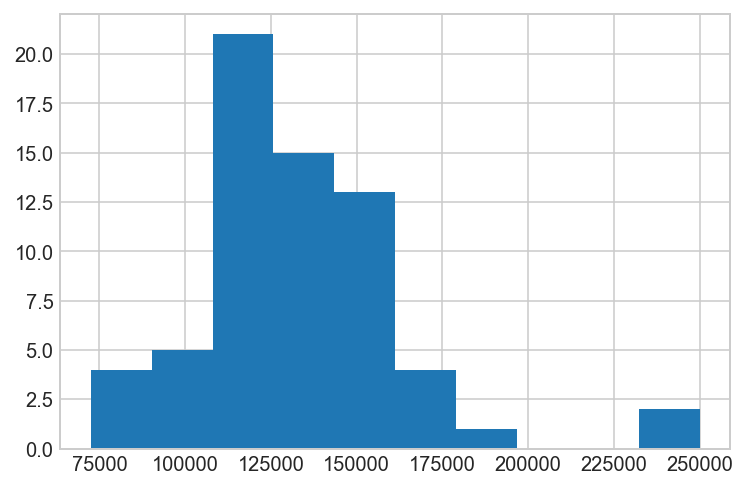

In [63]:
dfsn.hist(bins=10) #senior position salaries

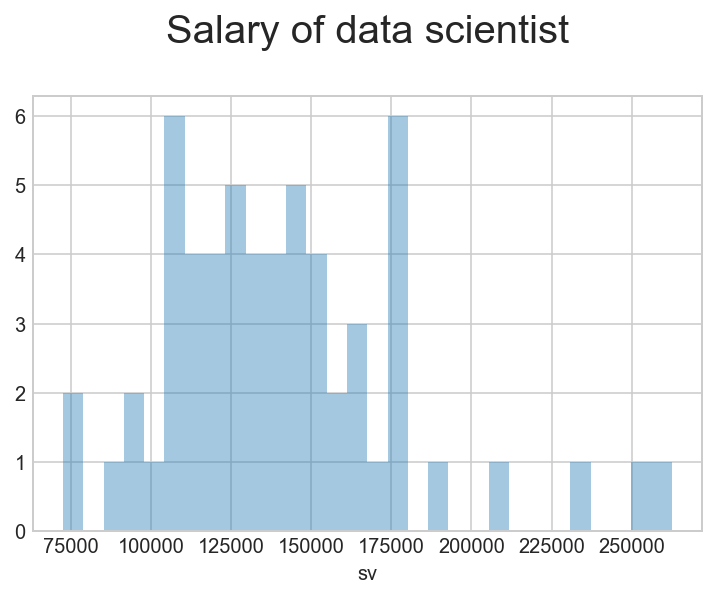

In [64]:
ax = sns.distplot(dfs[dfs.category==1]['sv'],bins=30, kde=False)
ax.set_title('Salary of data scientist\n',fontsize=20)
plt.show()

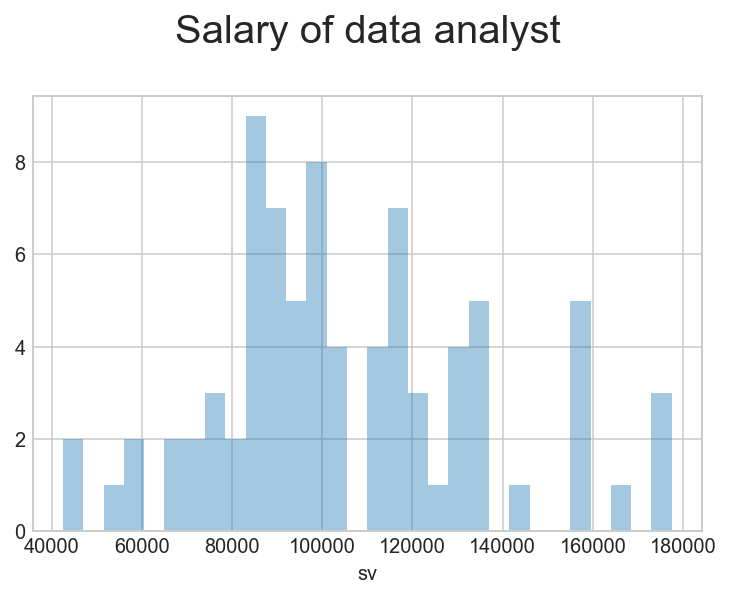

In [65]:
ax = sns.distplot(dfs[dfs.category==2]['sv'],bins=30, kde=False)
ax.set_title('Salary of data analyst\n',fontsize=20)
plt.show()

# EDA conclusions:
 We have seen that the average salaries don't significantly vary with industry or location or job category. However, salary distribution depend on the position is a junior or senior.

# part4 : Q1 to predict salary trend

first step : find out the features that affect salaries in addition to position levels. Job title is where to start with

In [96]:
df1=df[df.Title>'']

In [97]:
df1.shape

(1393, 13)

In [99]:
df1.head()

,index,Company,Industry,JobSummary,Location,Salary,ShortDesp,Title,category,sv,junior,senior,middle
0,0.0,Hydrogen Group Pty Ltd,Information & Communication Technology,About our Client:My client is global leader i...,Perth,£120000.00 - £150000.00 p.a. + plus super and ...,Global consulting firm seeks a Data Scientist ...,Data Scientist,1,236250.0,0,0,1
1,1.0,Finite IT Recruitment Solutions,Information & Communication Technology,\r\n Are you a Data Scientist looking for a ne...,Melbourne,NaN,Are you a Data Scientist looking for a new exc...,Data Scientist,1,0.0,0,0,1
2,2.0,Cubic Transportation Systems,Information & Communication Technology,Only applications submitted through our websit...,Sydney,$120000 - $159999,We are seeking a skilled Data Scientist to joi...,Data Scientist,1,139999.5,0,0,1
3,3.0,CSK Nexus Pty Ltd,Information & Communication Technology,"Our client, an Australian energy company opera...",Melbourne,NaN,Develop and improve the data science at this c...,Data Scientist/Engineer,1,0.0,0,0,1
4,4.0,iSelect Ltd,Science & Technology,"At iSelect, we get that most people find insur...",Melbourne,NaN,We are looking for a Data Scientist with at le...,Data Scientist,1,0.0,0,0,1


In [100]:
# We can use the TfidfVectorizer to find ngrams for us
vect = TfidfVectorizer(stop_words='english',ngram_range=(1,2))

# Pulls all of trumps tweet text's into one giant string
summaries = "".join(df1['Title'])
ngrams_summaries = vect.build_analyzer()(summaries)

Counter(ngrams_summaries).most_common(20)

[('data', 393),
 ('analyst', 149),
 ('engineer', 102),
 ('analytics', 83),
 ('scientist', 72),
 ('analystdata', 68),
 ('developer', 63),
 ('consultant', 61),
 ('scientistdata', 49),
 ('business', 49),
 ('senior', 45),
 ('big', 44),
 ('manager', 42),
 ('intelligence', 37),
 ('analyst data', 37),
 ('engineerdata', 36),
 ('software', 34),
 ('bi', 34),
 ('data analytics', 34),
 ('big data', 33)]

In [101]:
Counter(ngrams_summaries).most_common(30)

[('data', 393),
 ('analyst', 149),
 ('engineer', 102),
 ('analytics', 83),
 ('scientist', 72),
 ('analystdata', 68),
 ('developer', 63),
 ('consultant', 61),
 ('scientistdata', 49),
 ('business', 49),
 ('senior', 45),
 ('big', 44),
 ('manager', 42),
 ('intelligence', 37),
 ('analyst data', 37),
 ('engineerdata', 36),
 ('software', 34),
 ('bi', 34),
 ('data analytics', 34),
 ('big data', 33),
 ('data analyst', 32),
 ('lead', 28),
 ('data analystdata', 27),
 ('analystsenior', 26),
 ('data scientist', 24),
 ('science', 23),
 ('solution', 23),
 ('insights', 22),
 ('data scientistdata', 22),
 ('sydney', 21)]

In [102]:
features=['data', 'analy','engineer', 'scien','developer','consultant', 'business', 'big data','manager','intelligence',
 'software'] #among the most common 30 key words to select related feature names

In [104]:
for c in features:
    df1[c] =  df1['Title'].str.lower().str.contains(c)
    df1[c]=df1[c].apply(lambda x: int(x) if (x==True) | (x==False) else 0)

C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
df1.columns

Index(['index', 'Company', 'Industry', 'JobSummary', 'Location', 'Salary',
       'ShortDesp', 'Title', 'category', 'sv', 'junior', 'senior', 'middle',
       'data', 'analy', 'engineer', 'scien', 'developer', 'consultant',
       'business', 'big data', 'manager', 'intelligence', 'software'],
      dtype='object')

In [107]:
df1.head(2)

,index,Company,Industry,JobSummary,Location,Salary,ShortDesp,Title,category,sv,...,analy,engineer,scien,developer,consultant,business,big data,manager,intelligence,software
0,0.0,Hydrogen Group Pty Ltd,Information & Communication Technology,About our Client:My client is global leader i...,Perth,£120000.00 - £150000.00 p.a. + plus super and ...,Global consulting firm seeks a Data Scientist ...,Data Scientist,1,236250.0,...,0,0,1,0,0,0,0,0,0,0
1,1.0,Finite IT Recruitment Solutions,Information & Communication Technology,\r\n Are you a Data Scientist looking for a ne...,Melbourne,NaN,Are you a Data Scientist looking for a new exc...,Data Scientist,1,0.0,...,0,0,1,0,0,0,0,0,0,0


In [110]:
print(features)

['data', 'analy', 'engineer', 'scien', 'developer', 'consultant', 'business', 'big data', 'manager', 'intelligence', 'software']


In [134]:
#feature names for regression
features_reg=['data', 'analy', 'engineer', 'scien', 'developer', 'consultant', 'business', 'big data', 
              'manager', 'intelligence', 'software','junior','middle','senior']

In [135]:
df1s=df1[df1.sv>0] #dataset with salary information for training

In [136]:
df1s.head(2)

,index,Company,Industry,JobSummary,Location,Salary,ShortDesp,Title,category,sv,...,analy,engineer,scien,developer,consultant,business,big data,manager,intelligence,software
0,0.0,Hydrogen Group Pty Ltd,Information & Communication Technology,About our Client:My client is global leader i...,Perth,£120000.00 - £150000.00 p.a. + plus super and ...,Global consulting firm seeks a Data Scientist ...,Data Scientist,1,236250.0,...,0,0,1,0,0,0,0,0,0,0
2,2.0,Cubic Transportation Systems,Information & Communication Technology,Only applications submitted through our websit...,Sydney,$120000 - $159999,We are seeking a skilled Data Scientist to joi...,Data Scientist,1,139999.5,...,0,0,1,0,0,0,0,0,0,0


In [137]:
df1s.shape

(380, 24)

In [138]:
df1n=df1[df1.sv<=0] #dataset without salary information for test

In [139]:
df1n.head(2)

,index,Company,Industry,JobSummary,Location,Salary,ShortDesp,Title,category,sv,...,analy,engineer,scien,developer,consultant,business,big data,manager,intelligence,software
1,1.0,Finite IT Recruitment Solutions,Information & Communication Technology,\r\n Are you a Data Scientist looking for a ne...,Melbourne,NaN,Are you a Data Scientist looking for a new exc...,Data Scientist,1,0.0,...,0,0,1,0,0,0,0,0,0,0
3,3.0,CSK Nexus Pty Ltd,Information & Communication Technology,"Our client, an Australian energy company opera...",Melbourne,NaN,Develop and improve the data science at this c...,Data Scientist/Engineer,1,0.0,...,0,1,1,0,0,0,0,0,0,0


In [140]:
df1n.shape

(1013, 24)

In [141]:
X_test=df1n[features_reg]

In [142]:
X_train=df1s[features_reg]

In [143]:
y_train=df1s['sv']

In [144]:
X_train.head()

,data,analy,engineer,scien,developer,consultant,business,big data,manager,intelligence,software,junior,middle,senior
0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,0,0,0,1,0
6,1,0,0,1,0,0,0,0,0,0,0,0,1,0
8,1,0,0,1,0,0,0,0,0,0,0,0,1,0
18,1,0,0,1,0,0,0,1,0,0,0,0,1,0


# method 1: ridge regression for Q1

In [145]:
#to introduce Ridge regularization
from sklearn.linear_model import Ridge,LinearRegression, RidgeCV
from sklearn.model_selection import cross_val_score


In [152]:
# Initialize the StandardScaler object
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# use the "fit_transform" function to standardize the X design matrix
Xs_train = ss.fit_transform(X_train)
Xs_test=ss.fit_transform(X_test)

In [147]:
#introduce Ridge regularization for feature selection
ridge_alphas = np.logspace(0, 5, 200)    #to find the optimal alpha based on training data

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xs_train, y_train)

print(optimal_ridge.alpha_)

54.158713780794734


In [169]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xs_train, y_train, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[ 0.19030886  0.28935938  0.07831984  0.16810347  0.13595764  0.2972488
  0.16992861  0.08364794  0.24203588 -0.04223962]
0.16126708112727728


In [170]:
ridge.fit(Xs_train,y_train)

Ridge(alpha=54.158713780794734, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [171]:
score=ridge.score(Xs_train,y_train)
print('training data score:      '+str(score))


training data score:      0.28367426915054517


In [172]:
df1s['y_ridge']=ridge.predict(Xs_train)

C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [173]:
y_test=ridge.predict(Xs_test)

In [174]:
df1n['y_ridge']=y_test

C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# method 2: decision tree regression for Q1

In [157]:
from sklearn.tree import DecisionTreeRegressor

In [158]:
model=DecisionTreeRegressor(max_depth=3) #max depth=3

In [179]:
model10=DecisionTreeRegressor(max_depth=10) #max depth=10

In [159]:
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [180]:
model10.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [161]:
y_train_pred=model.predict(X_train)

In [186]:
df1n['y_decisionT10']=model10.predict(X_test)

C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [165]:
df1s['y_decisionT']=y_train_pred

C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [181]:
df1s['y_decisionT10']=model10.predict(X_train)

C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [166]:
df1s.head(2)

,index,Company,Industry,JobSummary,Location,Salary,ShortDesp,Title,category,sv,...,engineer,scien,developer,consultant,business,big data,manager,intelligence,software,y_decisionT
0,0.0,Hydrogen Group Pty Ltd,Information & Communication Technology,About our Client:My client is global leader i...,Perth,£120000.00 - £150000.00 p.a. + plus super and ...,Global consulting firm seeks a Data Scientist ...,Data Scientist,1,236250.0,...,0,1,0,0,0,0,0,0,0,141249.463636
2,2.0,Cubic Transportation Systems,Information & Communication Technology,Only applications submitted through our websit...,Sydney,$120000 - $159999,We are seeking a skilled Data Scientist to joi...,Data Scientist,1,139999.5,...,0,1,0,0,0,0,0,0,0,141249.463636


In [168]:
df1s.columns

Index(['index', 'Company', 'Industry', 'JobSummary', 'Location', 'Salary',
       'ShortDesp', 'Title', 'category', 'sv', 'junior', 'senior', 'middle',
       'data', 'analy', 'engineer', 'scien', 'developer', 'consultant',
       'business', 'big data', 'manager', 'intelligence', 'software',
       'y_decisionT'],
      dtype='object')

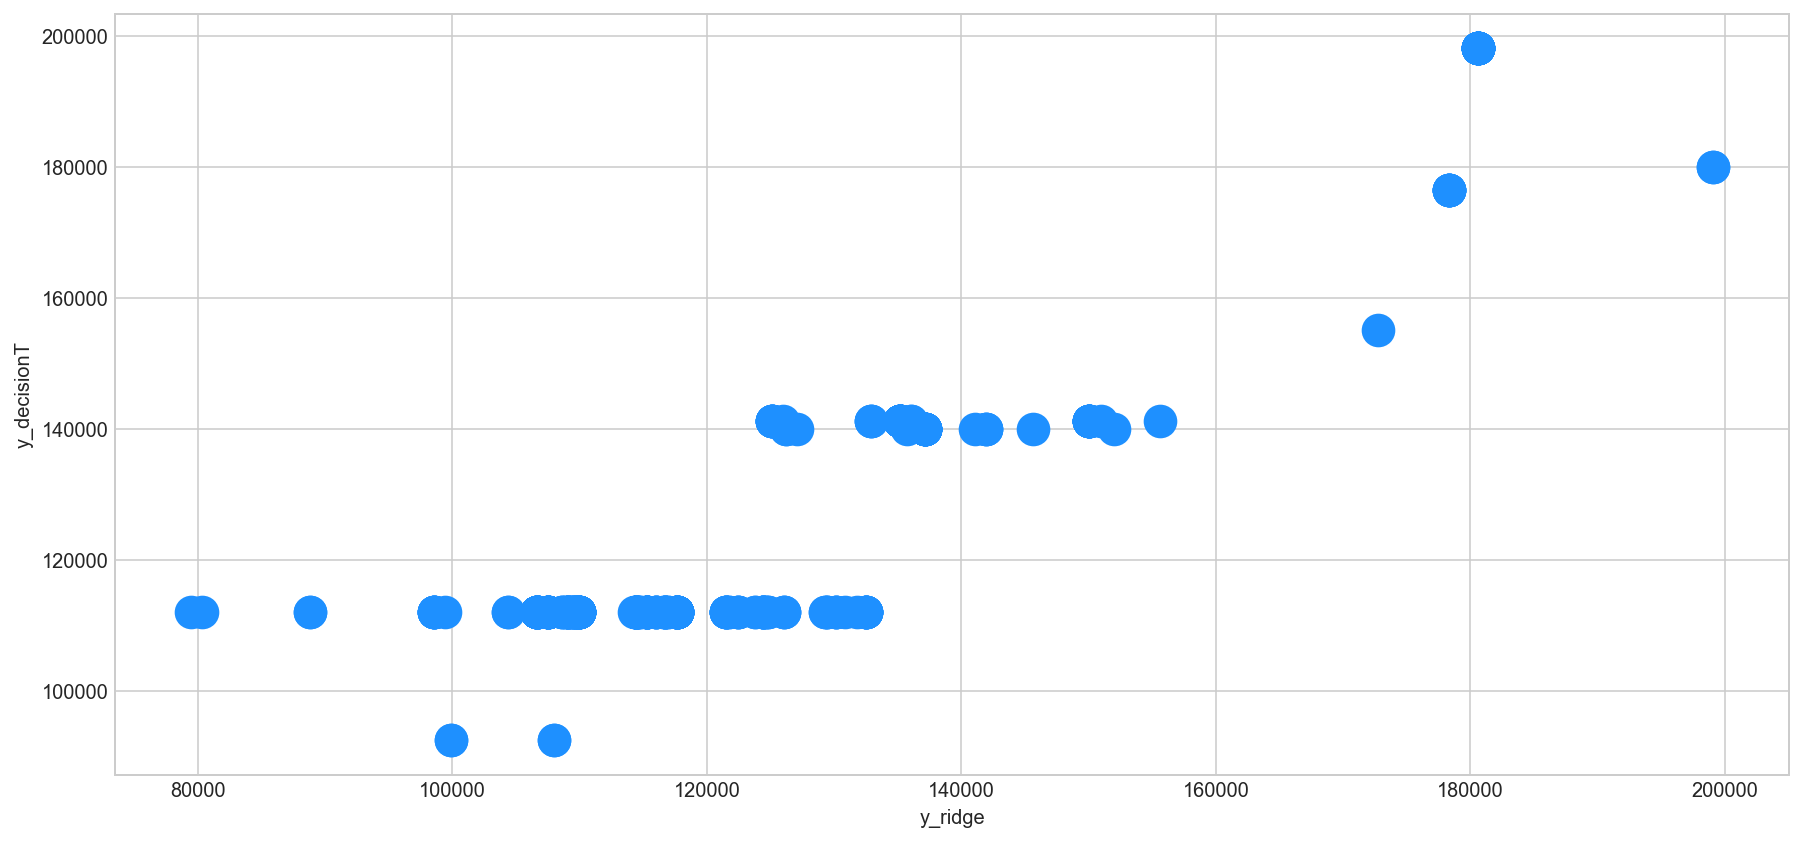

In [175]:
df1s.plot(x='y_ridge',y='y_decisionT', kind='scatter', color='dodgerblue',    figsize=(15,7), s=250)

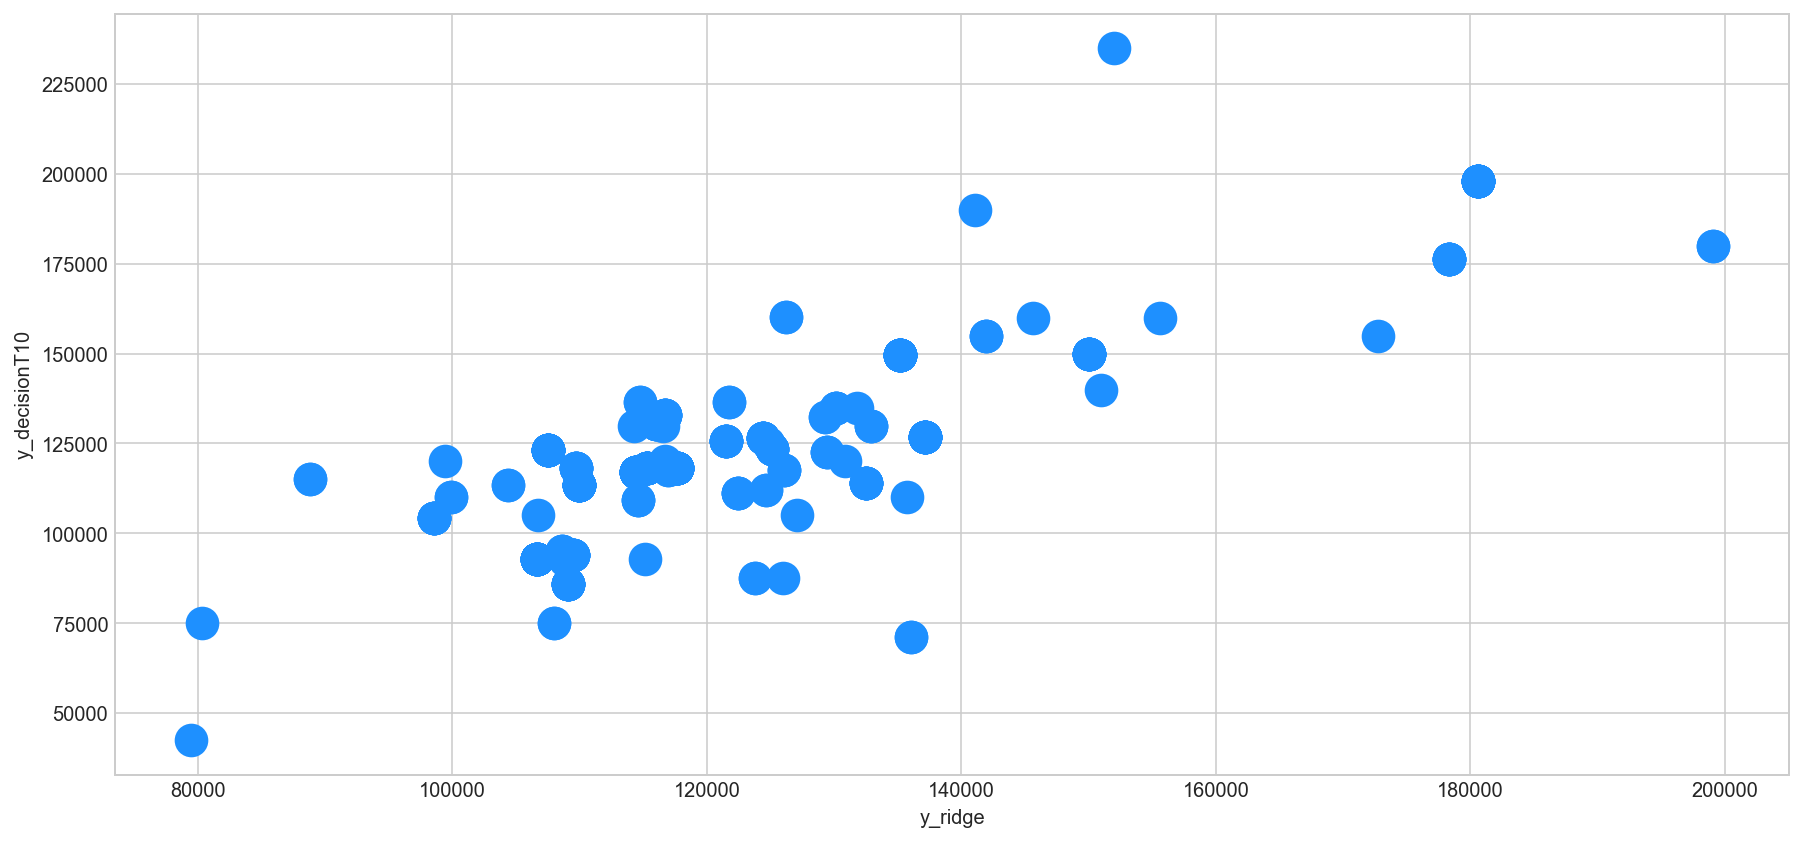

In [182]:
df1s.plot(x='y_ridge',y='y_decisionT10', kind='scatter', color='dodgerblue',    figsize=(15,7), s=250)

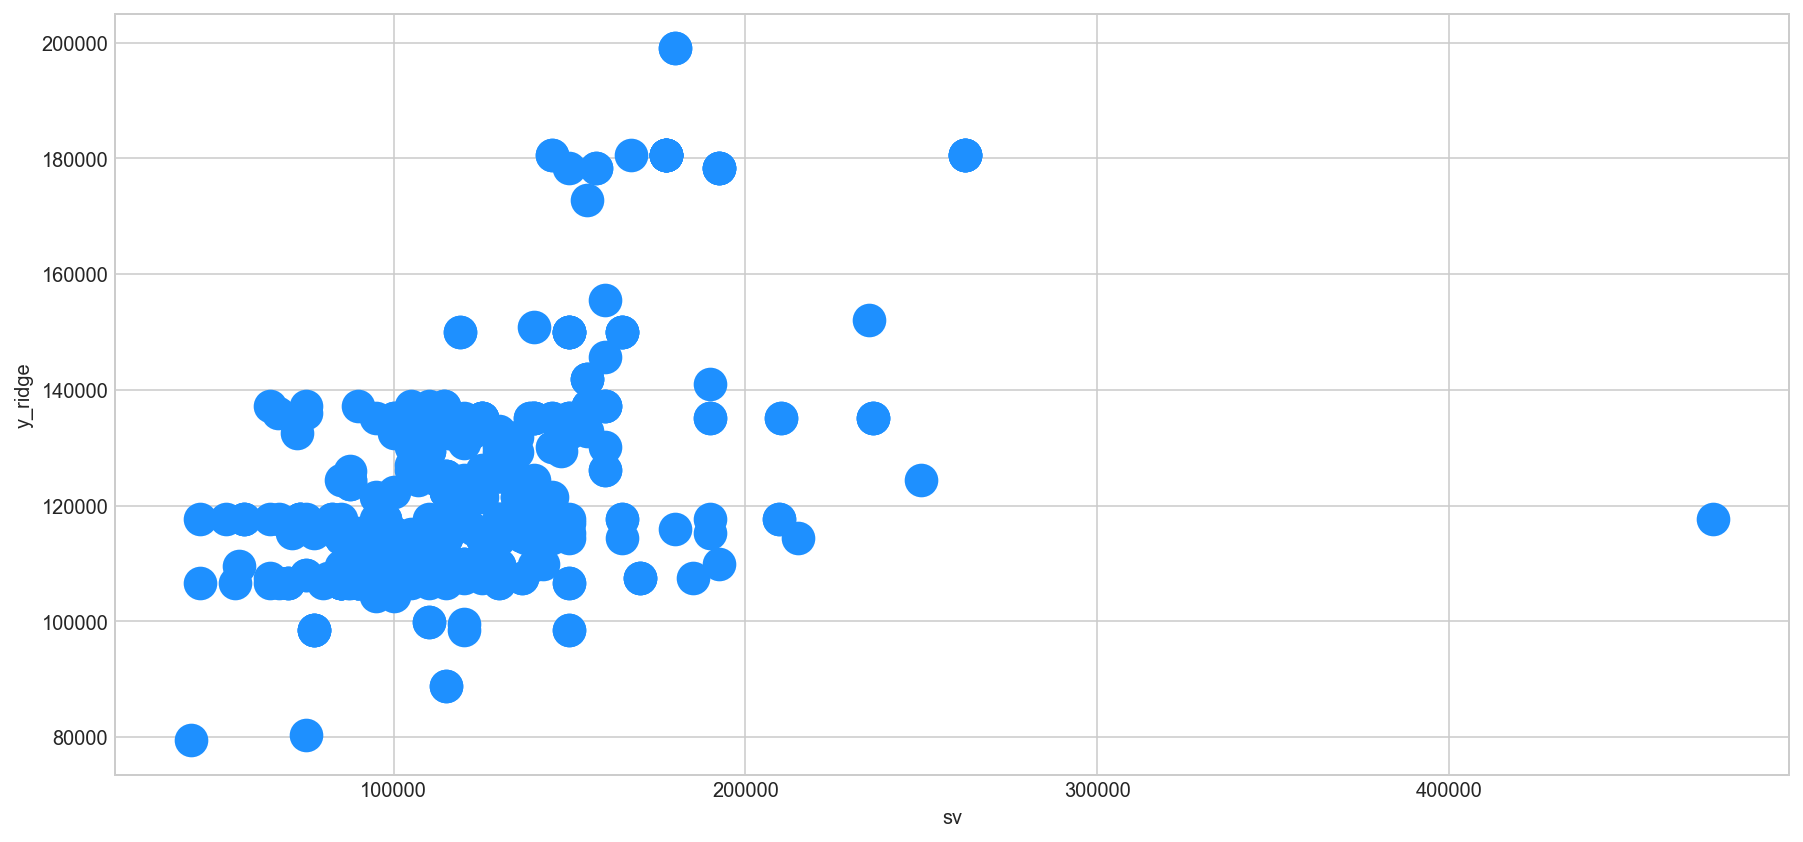

In [178]:
df1s.plot(x='sv',y='y_ridge', kind='scatter', color='dodgerblue',    figsize=(15,7), s=250)

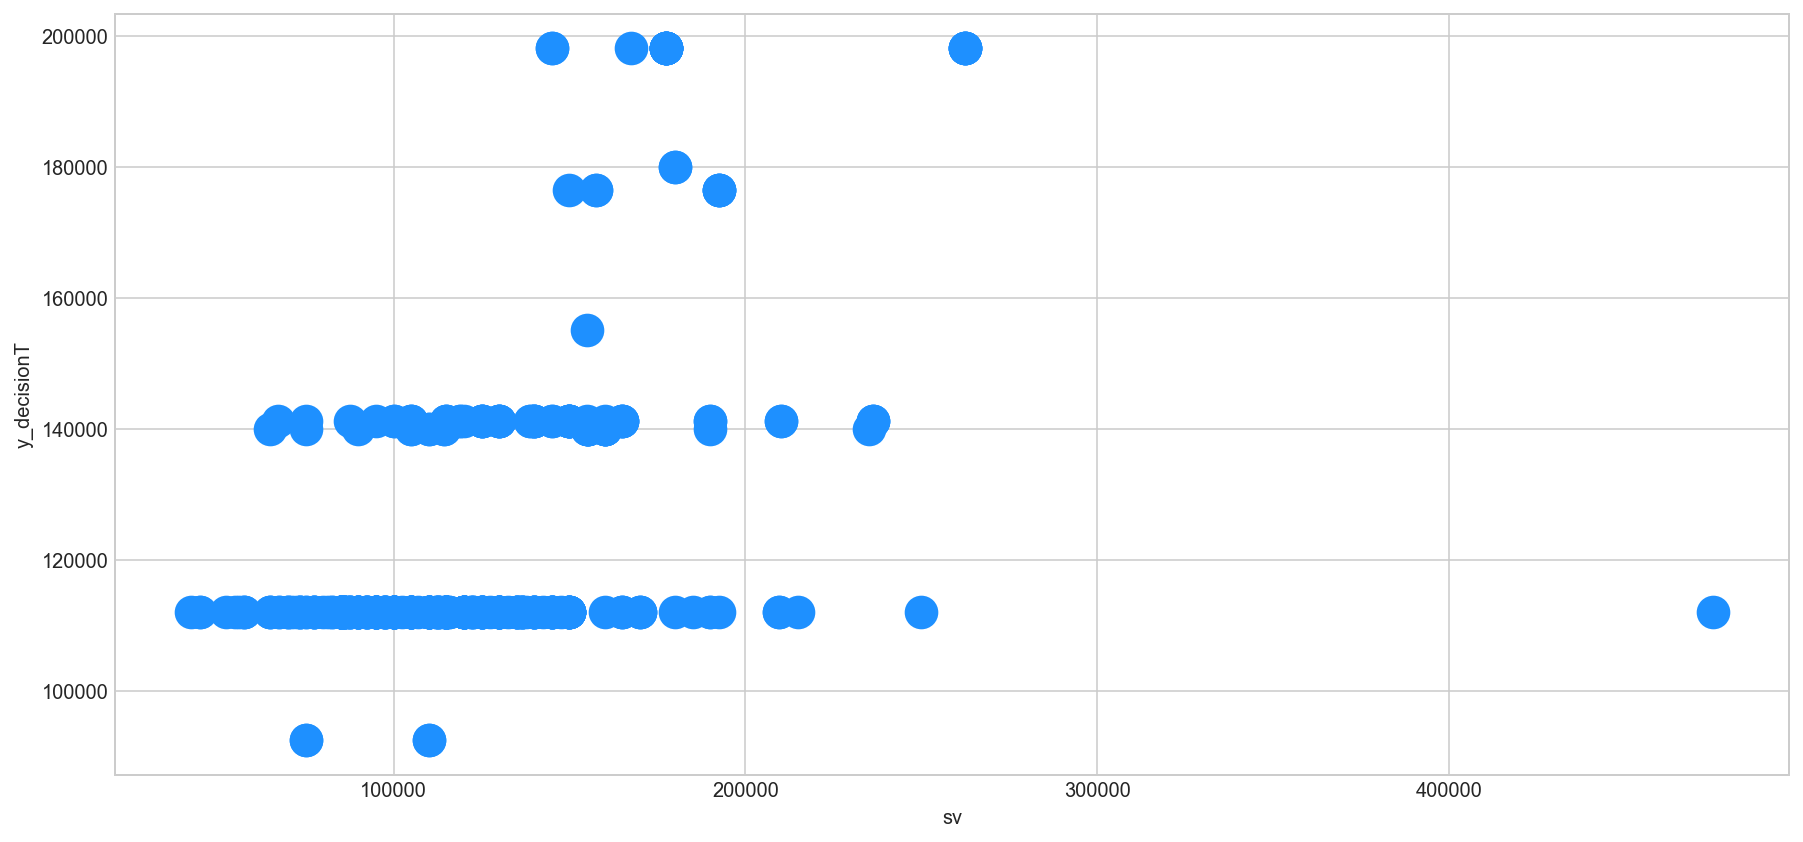

In [177]:
df1s.plot(x='sv',y='y_decisionT', kind='scatter', color='dodgerblue',    figsize=(15,7), s=250)

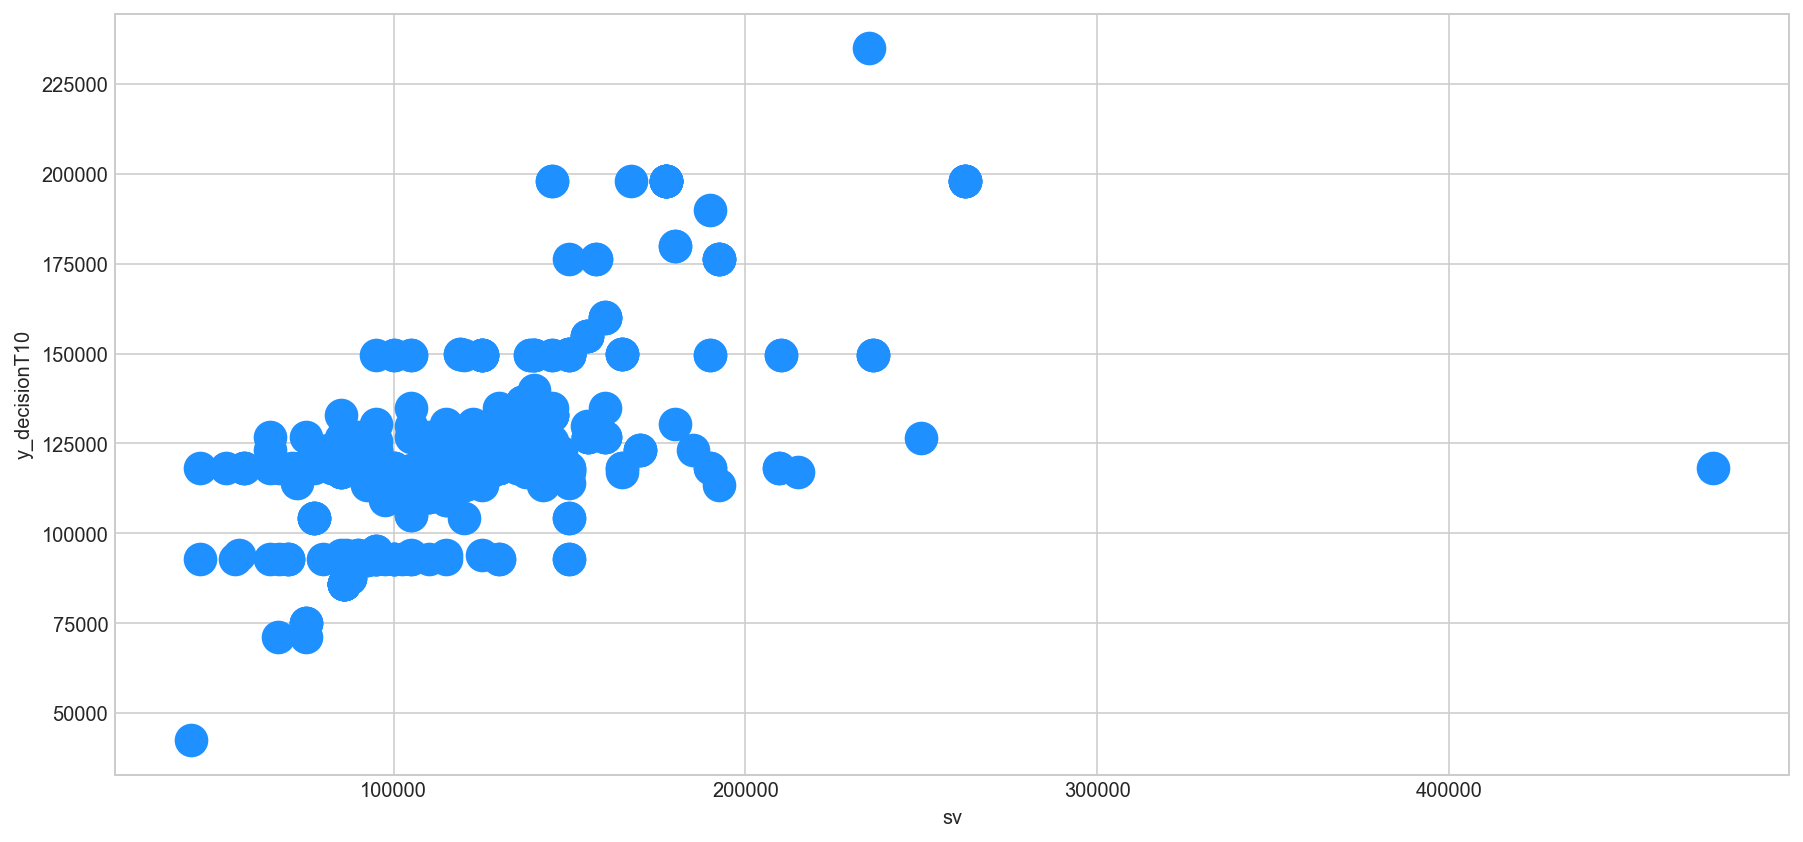

In [184]:
df1s.plot(x='sv',y='y_decisionT10', kind='scatter', color='dodgerblue',    figsize=(15,7), s=250)

# let's compare test data:

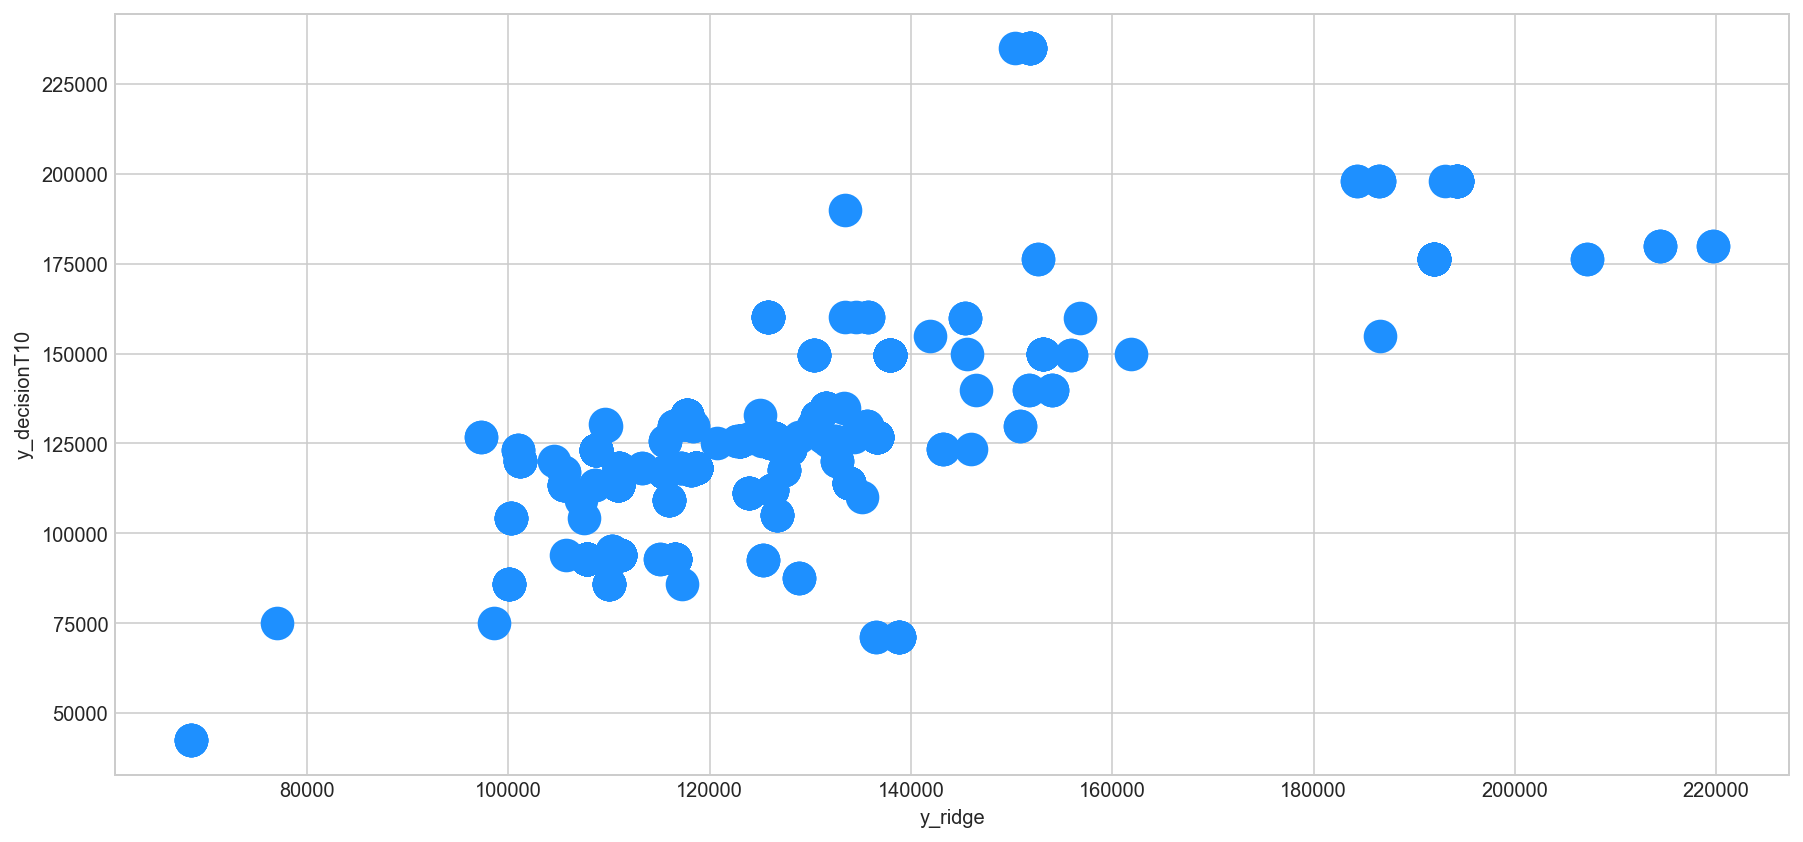

In [187]:
df1n.plot(x='y_ridge',y='y_decisionT10', kind='scatter', color='dodgerblue',    figsize=(15,7), s=250)

# Q1 summary:
decision tree regressor with max step=10 can well predict the salary. Ridge regression gives good prediction as well although the score is a bit low. they give similar results for test data.

# Q2 what key words differentiate job categories

In [254]:
df2=df[df.ShortDesp>'']

In [255]:
df2.shape

(1394, 13)

In [281]:
df2.reset_index(inplace=True)

In [302]:
analyst_index=df2[df2.category==2].index

In [303]:
engineer_index=df2[df2.category==3].index

In [304]:
developer_index=df2[df2.category==4].index

In [305]:
consultant_index=df2[df2.category==5].index

In [306]:
analyst_index

Int64Index([185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
            ...
            523, 524, 525, 526, 527, 528, 529, 530, 531, 532],
           dtype='int64', length=348)

In [282]:
X=df2['ShortDesp']

In [283]:
y=df2['category']

In [284]:
# use CountVectorizer to create document-term matrices from X
vect = CountVectorizer(stop_words='english')
X_dtm = vect.fit_transform(X)
#X_dtm = vect.transform(X)

In [285]:
X_dtm.shape

(1394, 2218)

In [286]:
print(vect.get_feature_names()[:51])

['000', '0423', '07', '10', '100', '100k', '108255', '11', '12', '120', '120k', '123411hours', '140k', '150k', '160pk', '180k', '1998', '1st', '200k', '2013', '2016', '2018', '2019', '2222', '24', '2xm', '360', '38requisition', '3905', '3d', '3remuneration', '450', '4927', '500', '65', '789', '80', '80k', '8217', '85', '8844', '90k', 'abb', 'abilities', 'ability', 'academic', 'accelerate', 'access', 'accomplished', 'accordance', 'account']


In [287]:
#my_stop=['000', '0423', '07', '10', '100', '100k', '108255', '11', '12', '120', '120k', '123411hours', '140k', '150k', '160pk', '180k', '1998', '1st', '200k', '2013', '2016', '2018', '2019', '2222', '24', '2xm', '360', '38requisition', '3905', '3d', '3remuneration', '450', '4927', '500', '65', '789', '80', '80k', '8217', '85', '8844', '90k', 'abb', 'abilities']

In [288]:
# last 50 features
print(vect.get_feature_names()[-50:])

['waiting', 'walk', 'want', 'wanted', 'wanting', 'wants', 'warehouse', 'warehousing', 'warner', 'waste', 'wastewater', 'water', 'way', 'wealth', 'web', 'webby', 'week', 'wellness', 'west', 'wework', 'whilst', 'wholesale', 'wide', 'wider', 'wildlife', 'williamtown', 'win', 'winning', 'wireframes', 'wizard', 'wl', 'work', 'workday', 'workflow', 'workforce', 'working', 'works', 'workshops', 'world', 'worlds', 'worldwide', 'writer', 'written', 'x5', 'year', 'years', 'yield', 'youman', 'youth', 'zealand']


In [289]:
df_train = pd.DataFrame(vect.transform(X).todense(),  columns=vect.get_feature_names())

In [290]:
df_train.shape

(1394, 2218)

In [298]:
df_scientist=df_train.head(184)

In [314]:
df_analyst=df_train[(df_train.index> analyst_index[0]) & (df_train.index<=analyst_index[-1])]

In [315]:
df_engineer=df_train[(df_train.index> engineer_index[0]) & (df_train.index<=engineer_index[-1])]

In [316]:
df_developer=df_train[(df_train.index> developer_index[0]) & (df_train.index<=developer_index[-1])]

In [317]:
df_consultant=df_train[(df_train.index> consultant_index[0]) & (df_train.index<=consultant_index[-1])]

In [319]:
#let's see what key words define 'data scientist'

In [318]:
df_scientist.mean().sort_values(ascending=False).head(10)
#in job's short description these words show importance in the following order:

data           0.989130
scientist      0.282609
analytics      0.244565
join           0.211957
team           0.211957
looking        0.173913
opportunity    0.173913
science        0.141304
business       0.141304
role           0.135870
dtype: float64

In [320]:
#let's see what key words define 'data analyst'
df_analyst.mean().sort_values(ascending=False).head(10)
#in job's short description these words show importance in the following order:

data           0.752161
analyst        0.368876
join           0.247839
team           0.216138
business       0.201729
opportunity    0.170029
analytics      0.158501
role           0.158501
looking        0.144092
seeking        0.109510
dtype: float64

In [321]:
#let's see what key words define 'data engineer'
df_engineer.mean().sort_values(ascending=False).head(10)
#in job's short description these words show importance in the following order:

data           0.792982
engineer       0.256140
join           0.242105
team           0.189474
opportunity    0.185965
looking        0.154386
big            0.150877
work           0.119298
exciting       0.119298
analytics      0.115789
dtype: float64

In [322]:
#let's see what key words define 'business intelligence developer'
df_developer.mean().sort_values(ascending=False).head(10)
#in job's short description these words show importance in the following order:

business        0.308989
developer       0.230337
bi              0.207865
data            0.207865
team            0.196629
intelligence    0.196629
join            0.185393
opportunity     0.174157
looking         0.151685
work            0.146067
dtype: float64

In [323]:
#let's see what key words define 'data science consultant'
df_consultant.mean().sort_values(ascending=False).head(10)
#in job's short description these words show importance in the following order:

data           0.316456
join           0.255696
opportunity    0.212658
team           0.194937
consultant     0.149367
analytics      0.146835
role           0.131646
looking        0.126582
work           0.121519
senior         0.113924
dtype: float64

In [265]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

In [334]:
knn_df_train=KNeighborsClassifier(p=5)

In [342]:
bagger_df_train=BaggingClassifier(knn_df_train)

In [343]:
print('knn score:',cross_val_score(knn_df_train,df_train,y,cv=10,n_jobs=1).mean())

knn score: 0.31389141847546403


In [344]:
km=knn_df_train.fit(df_train,y)

In [345]:
y_knn=km.predict(df_train)

In [346]:
print('Bagging score:',cross_val_score(bagger_df_train,df_train,y,cv=10,n_jobs=1).mean())

Bagging score: 0.3048698703300844


In [347]:
print('Bagging score:',cross_val_score(bagger_df_train,df_train,y,cv=10,n_jobs=5).mean())

Bagging score: 0.3240582710392948
